# Condensed Notebook for Query Execution
The purpose of this notebook is to give a step by step process for the two different image scraping methodology via either google images with serpapi or a saved html file to a local device then uploaded to the /html folder to be read by beautiful soup.

The work is comprised of two main steps: query generation and image calls

We begin by importing all the libraries used by the notebook

In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from serpapi import GoogleSearch

# SerpAPI Method
This particular method is useful for running large number of querries with partial accuracy (serpAPI may miss on certain searches that have viable data). This process thus may require a second pass through with the manual method described below for the occassional miss to validate the reason for missing. 

## The Helper Functions
This function is designed to pull images from the scraped google pages and return a pandas DataFrame object with the images's img attribute (the link to the image), the alt text, the href to connect back to the original article, and the article's title

In [5]:
def imagepull(url,q):
    url_get = requests.get(url).text
    soup = BeautifulSoup(url_get, 'html.parser')
    soup.prettify()
    # print(soup.find_all('img'))
    a = soup.find_all('div', {'data-ictx': "1"})
    holder = []
    # print(a)
    for div in a:
        # print(div)
        row = []
        row += [[img['src'] for img in div.find_all('img')][0]]
        row += [[img['alt'] for img in div.find_all('img')][0]]
        row += [[a['href'] for a in div.find_all('a', {'title': True})][0]]
        row += [[a['title'] for a in div.find_all('a', {'title': True})][0]]
        # row += [0, 0]
        holder.append(row)
    # print(holder)
    df = pd.DataFrame(holder,columns = ['image','alt','href','title'])
        # a = a.find_all('a', href=True)
    # print(a)
    # df['href'] = [al['href'] for al in a]
    # df['title'] = [al['title'] for al in a]
    # df['q'] = [q for img in a]
    return df
    # df = pd.concat(df)
    # return df 

In [6]:
def imgSelect(df):
    subdf = df[~df["image"].str.contains("data:")]
    if (len(subdf)>100):
        return subdf.head(100)
    else:
        return subdf

## Image Collection

There are three ways that I have so far discovered to scrape the images:
1. SerpAPI (seemingly popular but unsure if it would require budget)
2. Google Image Scraper (github project that seems to be not as robust as Serp)
3. Selenium + Pillow (mimics user)

We have chosen to use SerpAPI as it both adds protection to our searches but also seems to be the go to method for most developers. More information on SerpAPI and its pricing plans can be found here: https://serpapi.com/


### A basic image search

In [17]:
params = {
    "api_key": "a5541328816b83a27bcba1cf8025947b6084e86f926eeedb9b676478927382ec", #the api key for a given serpapi account
    "device": "desktop",  # the type of device you want to be perceived as (optional but good for protection)
    "engine": "google",   # the search engine you want serpapi to use
    "tbm" : "isch",       # type of returned page-- "isch" is an image search
    "q": '"Barack Obama" site:"https://www.csmonitor.com" before:2022 after:2020',  # the query-- this is what you as a user would type into the search box
    "location": "Austin, Texas, United States", #location (optional)-- provide a location for the search engine to register you as located in
    "google_domain": "google.com", #self explanitory as google.com is the version we wish to search
    "gl": "us",  #us for global
    "hl": "en",  #english for results
}

search = GoogleSearch(params)  #GoogleSearch function uses params to run a google search via serpapi
results = search.get_dict()  #returned results from google search
# print(results)

https://serpapi.com/search


Now to get the results:

In [18]:
print(results['search_metadata']['raw_html_file']) #uses the returned dictionary to just get the raw html
df = imagepull(results['search_metadata']['raw_html_file'],params['q']) #apply imagepull to get images from raw html
display(df)
df.to_csv('temp.csv') #save to file temp.csv

https://serpapi.com/searches/1c2809af1c01715a/639b91608cd8785788868a09.html


image  \
0   data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
1   data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
2   data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
3   data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
4   data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
..                                                ...   
95  https://encrypted-tbn0.gstatic.com/images?q=tb...   
96  https://encrypted-tbn0.gstatic.com/images?q=tb...   
97  https://encrypted-tbn0.gstatic.com/images?q=tb...   
98  https://encrypted-tbn0.gstatic.com/images?q=tb...   
99  https://encrypted-tbn0.gstatic.com/images?q=tb...   

                                                  alt  \
0   Was Barack Obama a transformative president? -...   
1   Barack Obama: Hope, change, and contradiction ...   
2   Barack Obama: First president who fails to rai...   
3           Barack Obama's milestones - CSMonitor.com   
4   The Bridge: The Life and Rise of Barack Obama ...   
..                                                ...   
95  Obama awards VP Biden the Medal of Freedom in ...   
96  Obama hits the trail for Hillary Clinton: Will...   
97  For a 2012 Obama win, hip-hop stars must 'Bara...   
98  Mitt Romney vs. Barack Obama: Who gets the dog...   
99  One night only: Barack Obama vs. Bobby Jindal ...   

                                                 href  \
0   https://www.csmonitor.com/USA/Politics/2017/01...   
1   https://www.csmonitor.com/Commentary/John-Hugh...   
2   https://www.csmonitor.com/USA/Elections/From-t...   
3   https://www.csmonitor.com/Photo-Galleries/In-P...   
4   https://www.csmonitor.com/Books/Book-Reviews/2...   
..                                                ...   
95  https://www.csmonitor.com/USA/2017/0113/Obama-...   
96  https://www.csmonitor.com/USA/Politics/2016/07...   
97  https://www.csmonitor.com/Commentary/Opinion/2...   
98  https://www.csmonitor.com/USA/Latest-News-Wire...   
99  https://www.csmonitor.com/USA/Politics/The-Vot...   

                                                title  
0   Was Barack Obama a transformative president? -...  
1   Barack Obama: Hope, change, and contradiction ...  
2   Barack Obama: First president who fails to rai...  
3           Barack Obama's milestones - CSMonitor.com  
4   The Bridge: The Life and Rise of Barack Obama ...  
..                                                ...  
95  Obama awards VP Biden the Medal of Freedom in ...  
96  Obama hits the trail for Hillary Clinton: Will...  
97  For a 2012 Obama win, hip-hop stars must 'Bara...  
98  Mitt Romney vs. Barack Obama: Who gets the dog...  
99  One night only: Barack Obama vs. Bobby Jindal ...  

[100 rows x 4 columns]

## The full code (Use this to generate your own)

First we need to specify our querry values (the search terms). Three google search features were used, 
1. "site:" searches for a specific site that the data can be found on
2. "before:" and "after:" searches for images published before and after the years following the keywords
3. "" generates an exact phrase search

In [12]:
#generate news outlets of interest
news = ['https://www.bbc.com','https://www.nytimes.com',
                 'https://www.huffpost.com', 'https://www.washingtonpost.com',
                 'https://www.wsj.com', 'https://www.usnews.com',
                 'https://time.com','https://www.reuters.com',
                 'https://www.cnn.com','https://www.cbsnews.com', 'https://www.latimes.com',
                 'https://news.yahoo.com','https://www.usatoday.com', 'www.dailymail.co.uk',
                 'https://www.cnbc.com','https://www.csmonitor.com',
                 'https://abcnews.go.com', 'https://www.nbcnews.com',
                 'https://www.foxnews.com','https://www.newsmax.com'
                ]
# list of people
people = ['Joe Biden','Donald Trump','Kamala Harris','Mitch Mcconnell','Nancy Pelosi',
          'Mike Pence', 'Barack Obama', 'Hillary Clinton', 'Kevin McCarthy','Liz Cheney',
          'Chuck Schumer', 'Hal Rogers', 'Mitt Romney', 'Elizabeth Warren', 'John Roberts',
          'Bernie Sanders','Joe Manchin','Cory Booker','Ted Cruz','Gavin Newsom',
          'Rand Paul','Marco Rubio','Amy Klobuchar','Susan Collins','Bill de Blasio',
          'Janet Yellen','Steny Hoyer','James Clyburn','RAndy Biggs','Greg Abbott'
         ]
#create list of people found on news over the years 2012-22
queries = []
for y in range(2012,2022):
    queries+= ['"'+person+'" site:"'+ i+'" before:'+str(y+1)+' after:'+str(y-1) for i in news for person in people]
print(len(queries))
display(queries[:5])

6000


['"Joe Biden" site:"https://www.bbc.com" before:2013 after:2011',
 '"Donald Trump" site:"https://www.bbc.com" before:2013 after:2011',
 '"Kamala Harris" site:"https://www.bbc.com" before:2013 after:2011',
 '"Mitch Mcconnell" site:"https://www.bbc.com" before:2013 after:2011',
 '"Nancy Pelosi" site:"https://www.bbc.com" before:2013 after:2011']

To change what you search, all you have to do is change the queries array and run the code below-- every other print statement is the link to the serpapi scraped website

In [2]:
# take top 100 for each 
sampledf = pd.DataFrame()
for q in queries:
    params = {
        "api_key": "c5e81b782bd673c817aa1e6aebc4d0f8007f696344eaebd49b01125a639ecdf8",
        "device": "desktop",
        "engine": "google",
        "tbm" : "isch",
        "q": q,
        "location": "Austin, Texas, United States",
        "google_domain": "google.com",
        "gl": "us",
        "hl": "en",
    }
    search = GoogleSearch(params)
    results = search.get_dict()
    print(results['search_metadata']['raw_html_file'])
    df = pd.DataFrame()
    try:
        df = imagepull(results['search_metadata']['raw_html_file'],params['q'])
    except:
        print("No results found for " + q)
    df = imgSelect(df)
    df = pd.concat([pd.Series(q, index=df.index), df], axis = 1)
    sampledf = pd.concat([sampledf, df])
display(sampledf)
sampledf.to_csv('data.csv')  #save images to data.csv

In [ ]:
full = pd.read_csv('finalResults.csv') #name of current data csv-- comment out if this is the newest data/no previous data exists
full = pd.concat([full,sampledf])
full.to_csv('finalResults.csv') #name of full csv with new data appended

# Manual Save Method
This method is useful for small search bases or quality control after a run through of the SerpAPI method. Many of these steps require a bit of set up:
1. Confirm the /htmls folder exists in the root
2. Confirm that prior to running any code the folder is empty (this is to prevent duplicates, however, later code also runs a similar function)
3. The list of search terms is in an easy to copy place (my preference was an excel sheet as copying cells was much easier than the alternative)

## Saving the html files
This step must be done manually as Google has protection against opening up tabs from the terminal (this is the slowest step to the whole process so definetely the sticking point overall).
1. Given a google search navigate to the images tab-- for the sake of example, I will be searching for "Joe Biden" site:"https://www.cnbc.com" before:2022 after:2020

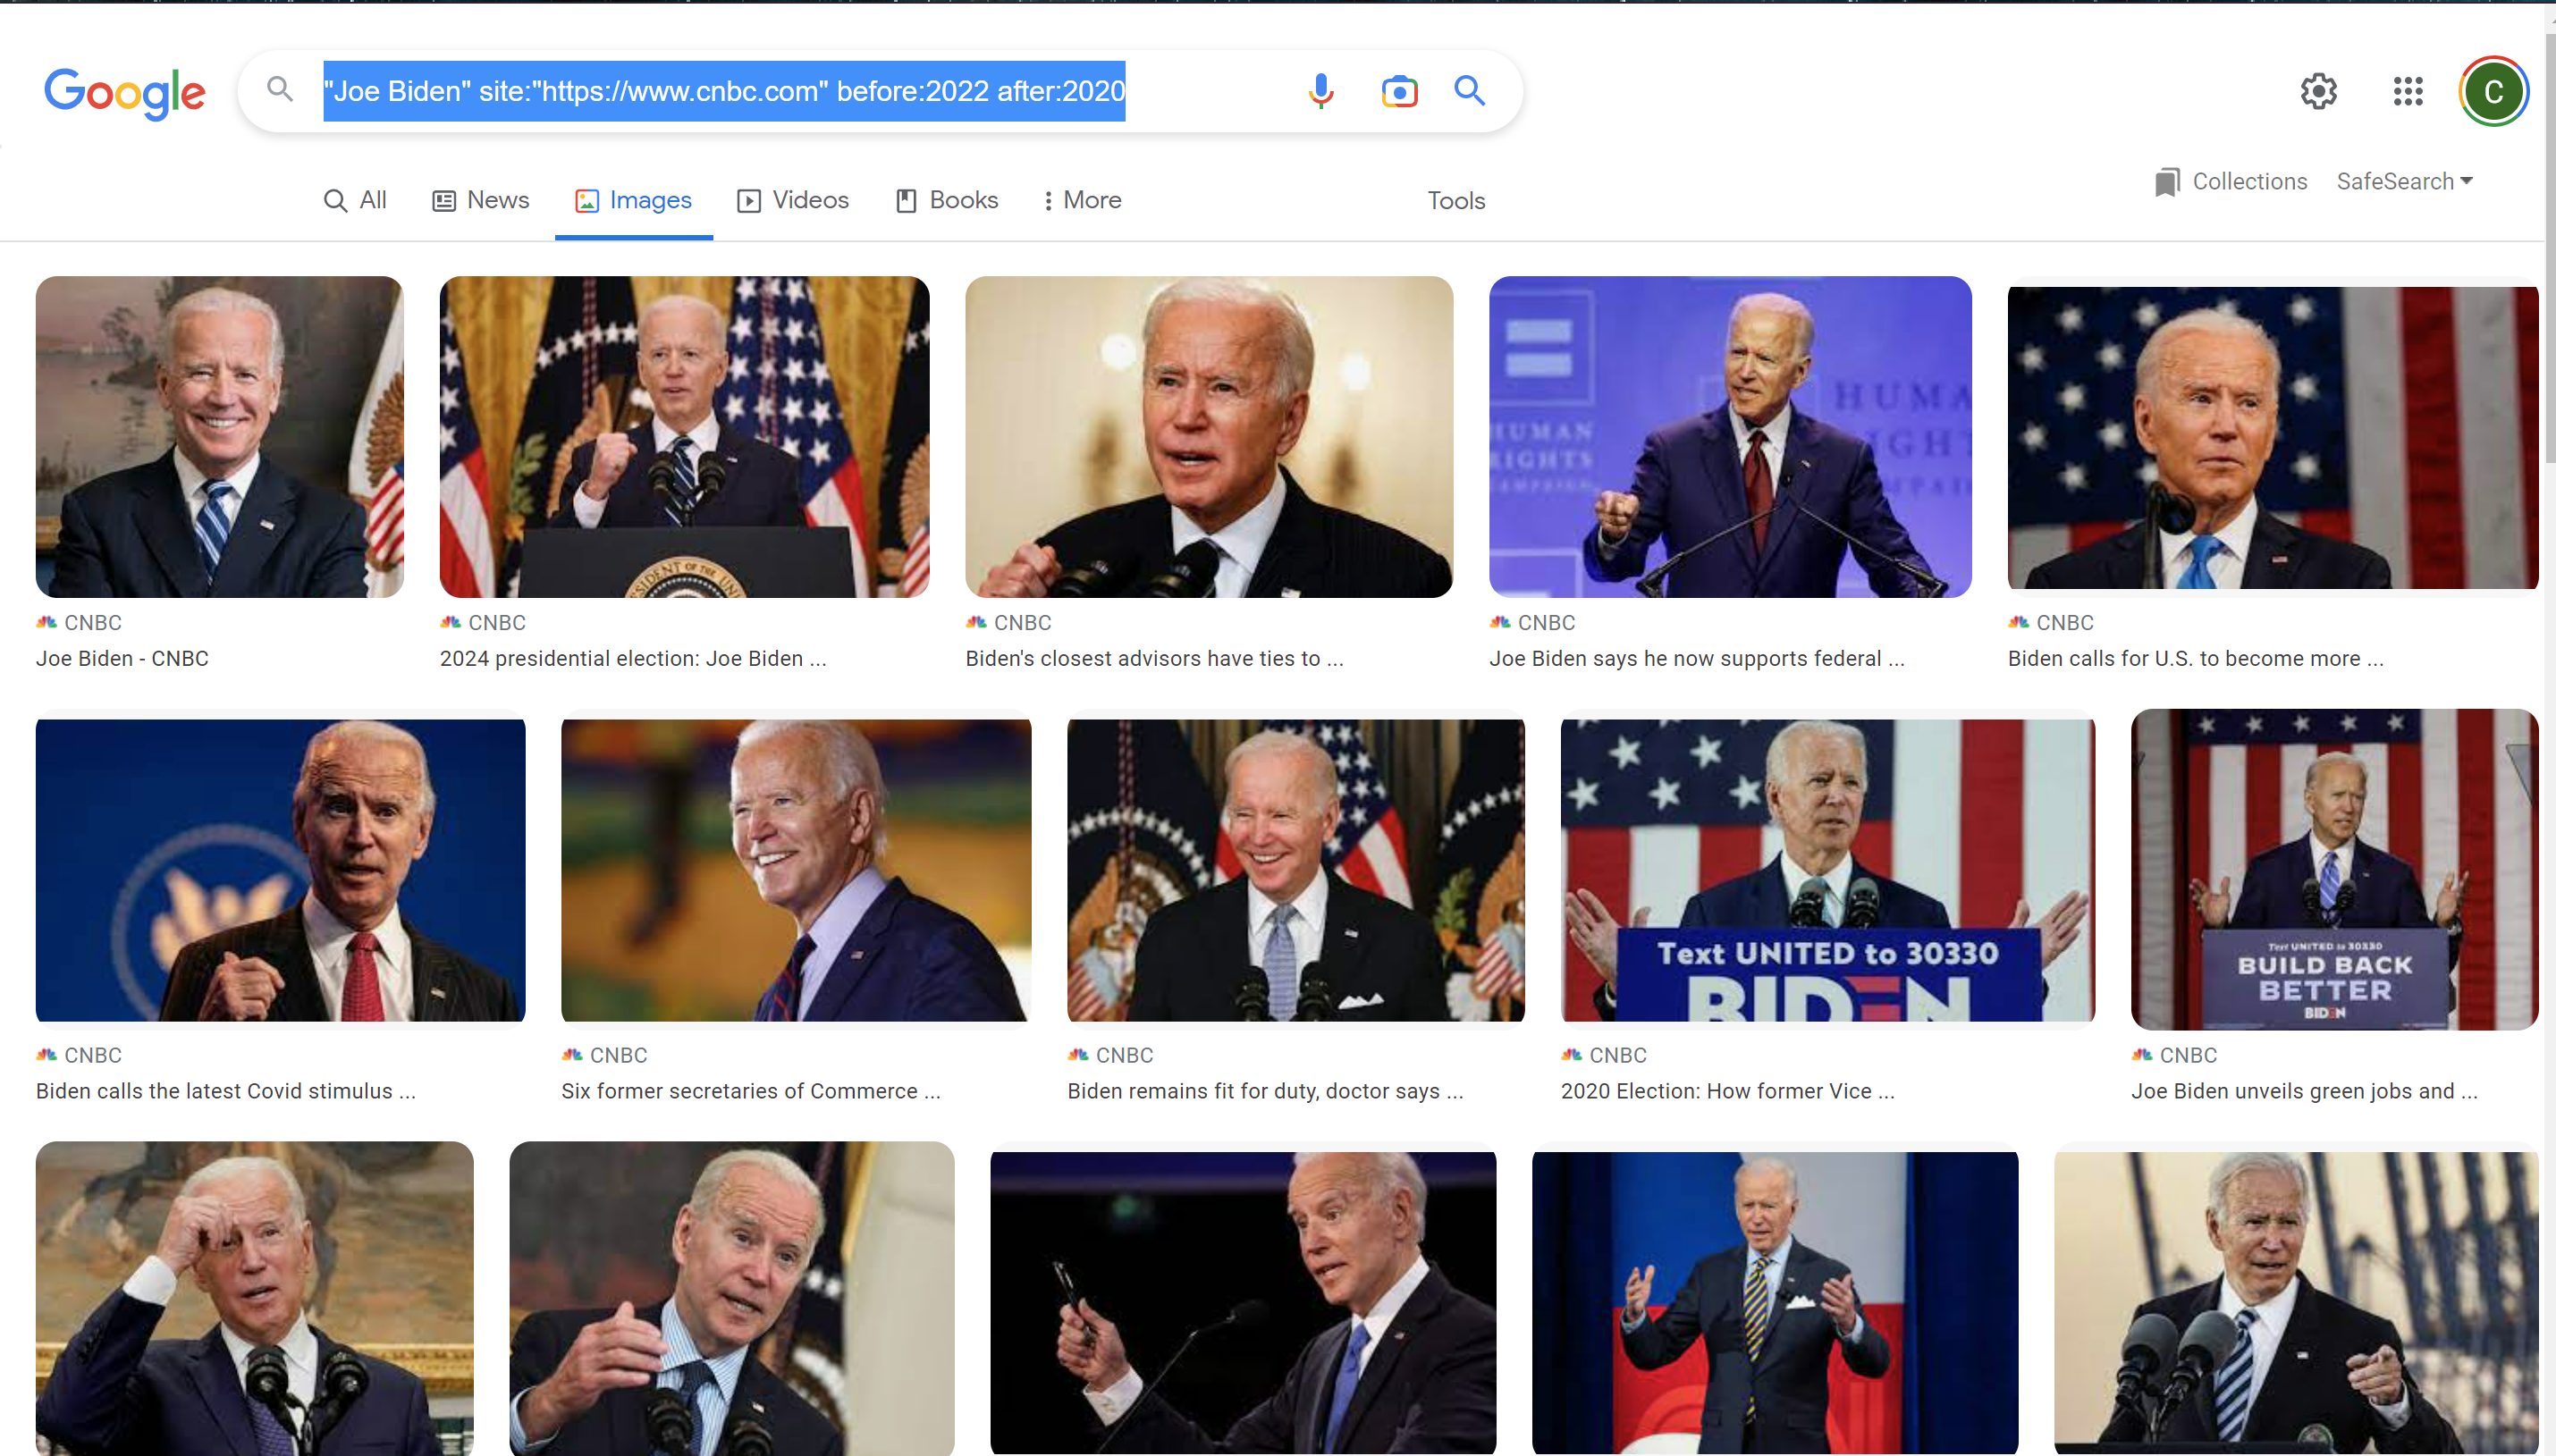

2. Now that I am on the page, I will save the file (Ctrl+S for Windows Cmd+S for Mac) and will save it to a known location on my local device (here in a research folder):
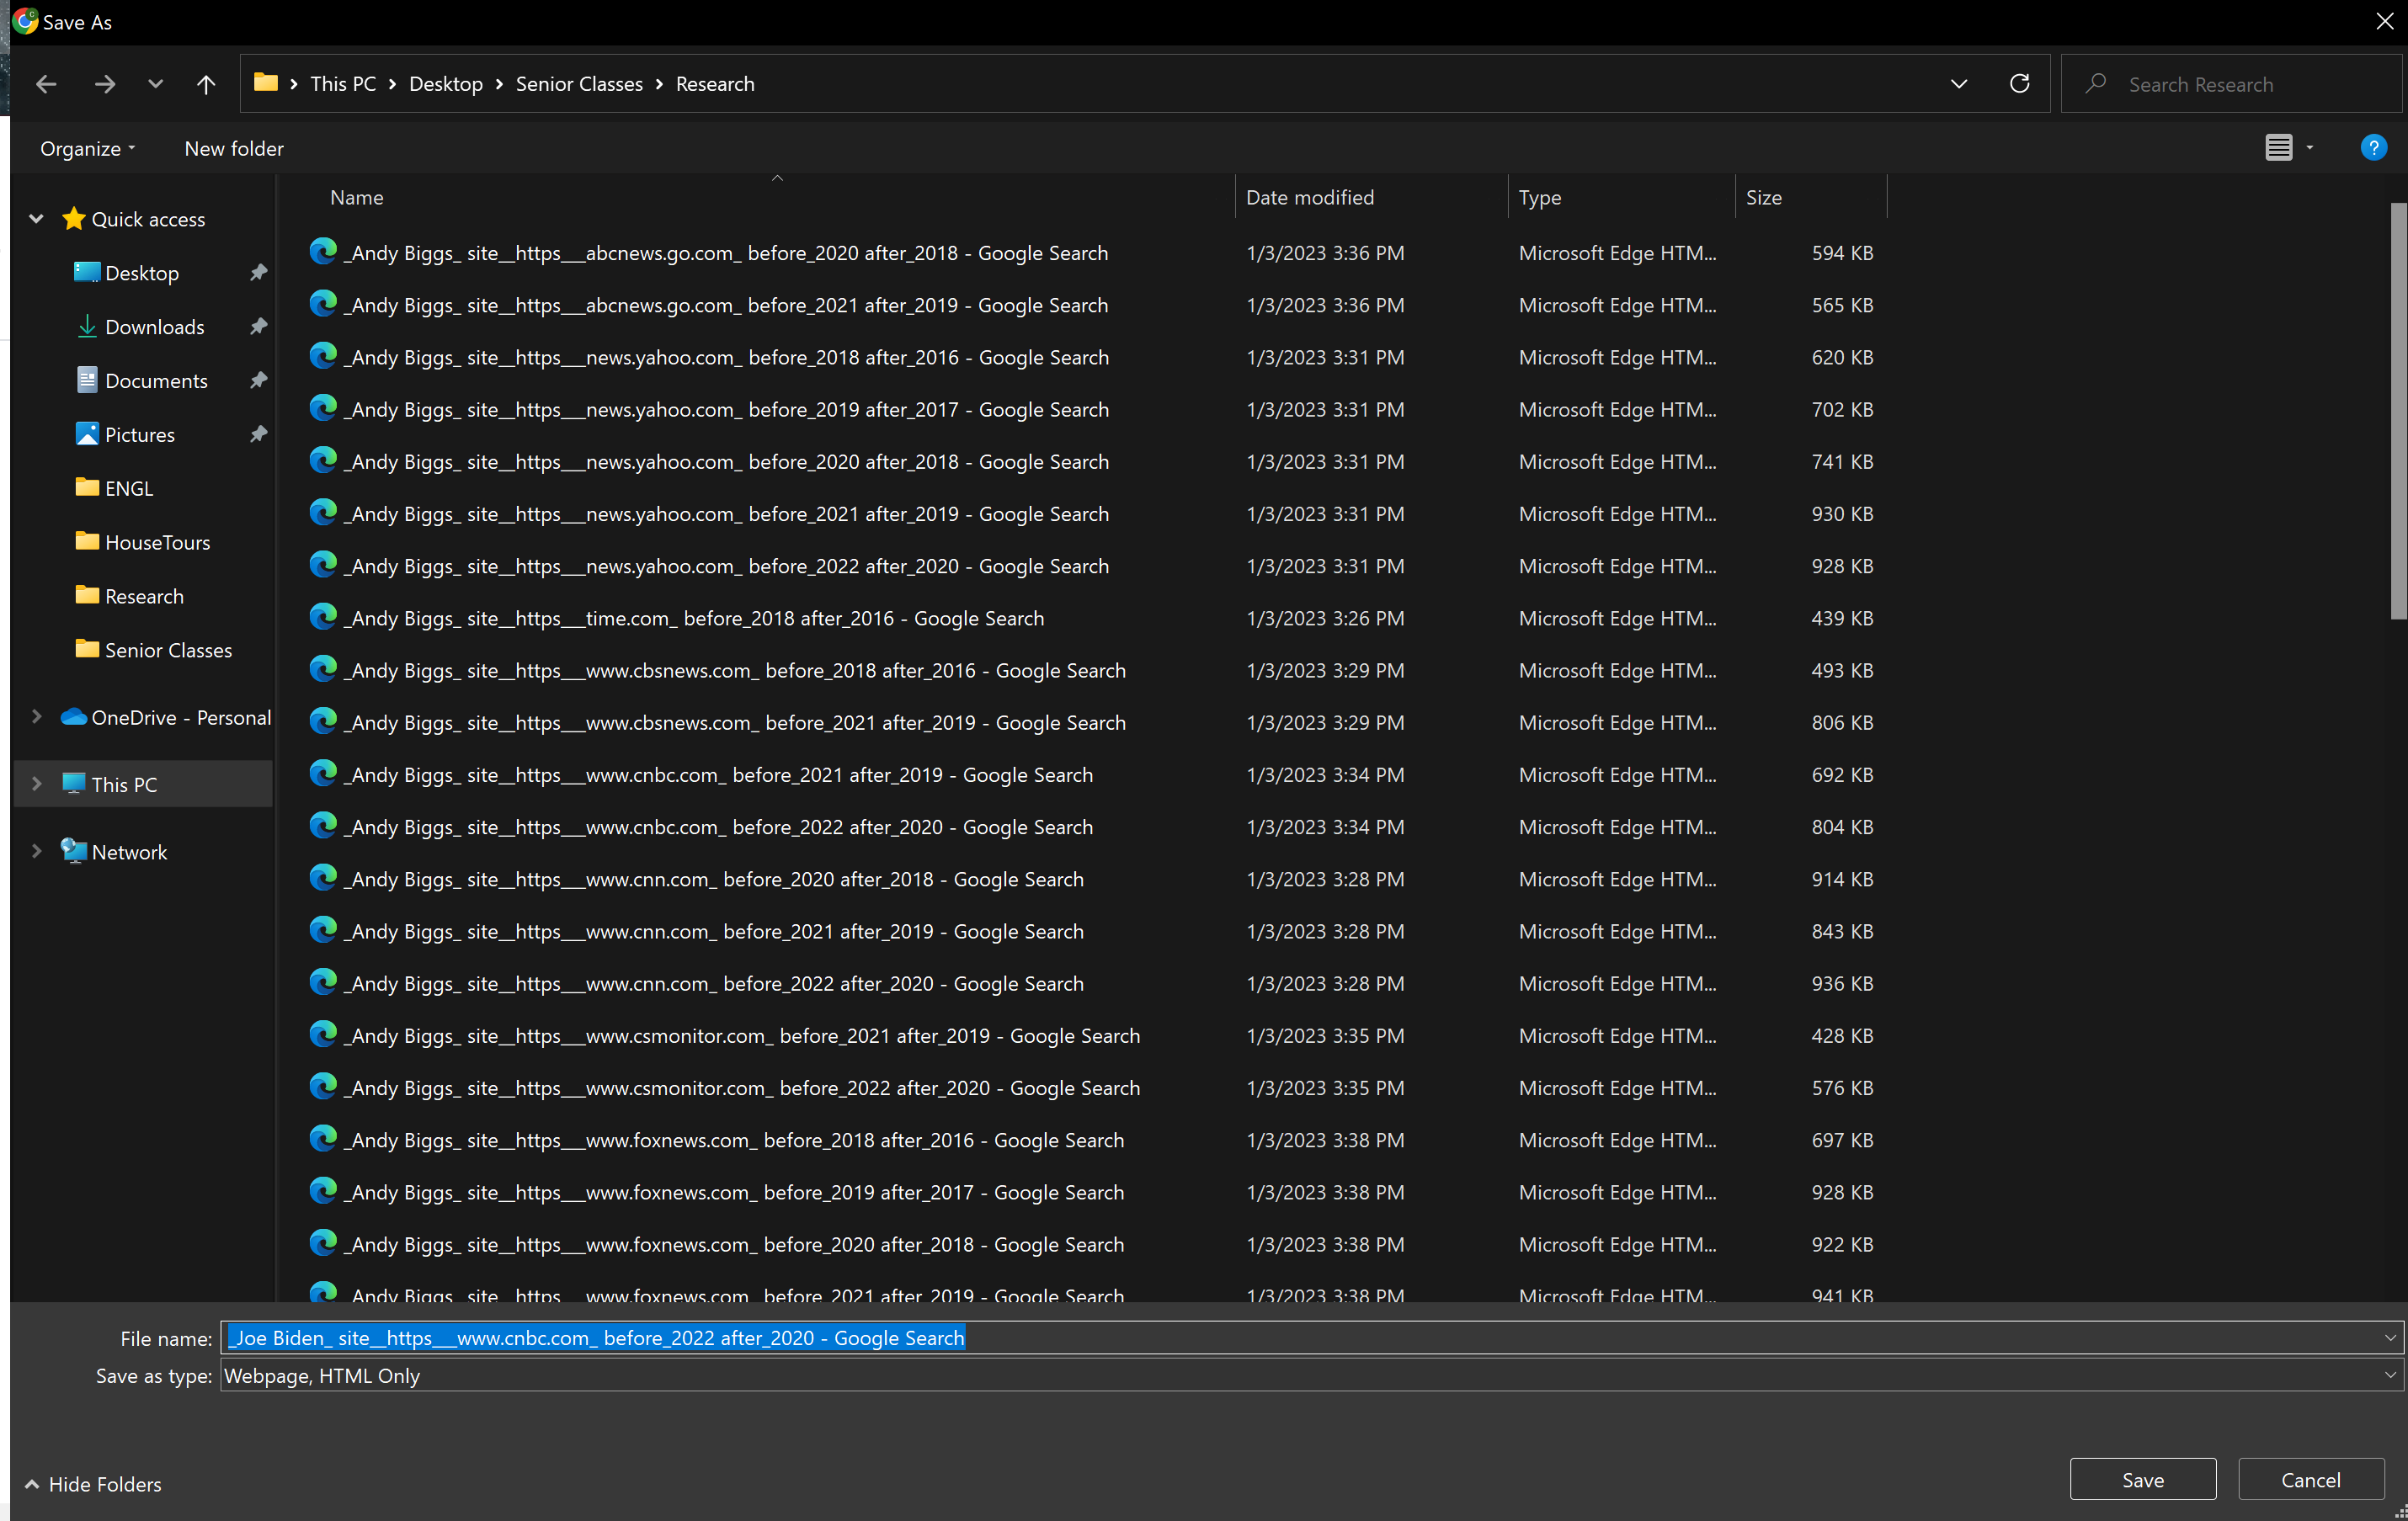
3. Next, I will go into the htmls folder and use the upload button to upload the saved local file to the hub
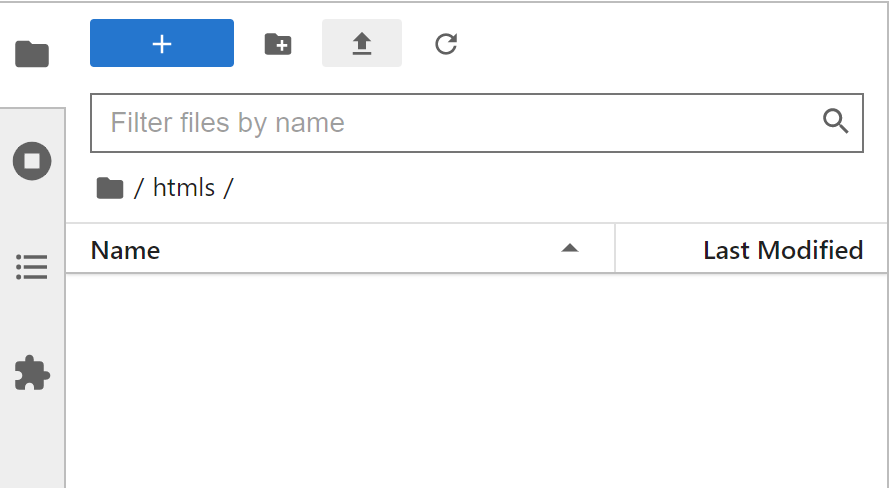
4. Now I will repeat this process until all the searches I need have corresponding html files in the hub

## Code Cells

Used to save the images from the html files to a pandas DataFrame

In [6]:
def imagepullLocal(contents):
    soup = BeautifulSoup(contents, 'html')
    soup.prettify()
    # print(soup)
    a = soup.find_all('div', {'data-ictx': "1"})
    # print(len(a))
    holder = []
    d0 = soup.find('input').get('value')
    # d0 = "No."
    # print(a)
    for div in a:
        # print(div.text)
        row = []
        row += [[img.get('src') for img in div.find_all('img')][0]]
        row += [[img['alt'] for img in div.find_all('img')][0]]
        row += [[a['href'] for a in div.find_all('a', {'title': True})][0]]
        row += [[a['title'] for a in div.find_all('a', {'title': True})][0]]
        # row += [0, 0]
        holder.append(row)
    # print(holder)
    df = pd.DataFrame(holder,columns = ['image','alt','href','title'])
    df['0'] = d0
        # a = a.find_all('a', href=True)
    # print(a)
    # df['href'] = [al['href'] for al in a]
    # df['title'] = [al['title'] for al in a]
    # df['q'] = [q for img in a]
    return df
    # df = pd.concat(df)
    # return df 

In [11]:
import os
from pathlib import Path
df = pd.DataFrame()
for filename in os.listdir('htmls'):
    if filename == '.ipynb_checkpoints':
        continue
    print(filename)
    contents=Path("htmls/"+ filename).read_text()
    hold = imagepullLocal(contents)
    df = pd.concat([df,hold])
display(df.head())
df.to_csv("ManualEntry.csv")
full = pd.read_csv('finalResults.csv') #name of current data csv-- comment out if this is the newest data/no previous data exists
full = pd.concat([full,df])
full.to_csv('finalResults.csv') #name of full csv with new data appended

_Joe Biden_ site__https___www.cnbc.com_ before_2022 after_2020 - Google Search.html


image  \
0  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
1  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
2  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
3  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
4  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   

                                                 alt  \
0                                   Joe Biden - CNBC   
1  2024 presidential election: Joe Biden expects ...   
2  Biden's closest advisors have ties to big busi...   
3  Joe Biden: Climate change is 'number one issue...   
4  Joe Biden says he now supports federal funding...   

                                                href  \
0                    https://www.cnbc.com/joe-biden/   
1  https://www.cnbc.com/2021/03/25/2024-president...   
2  https://www.cnbc.com/2021/03/20/bidens-closest...   
3  https://www.cnbc.com/2020/10/24/joe-biden-clim...   
4  https://www.cnbc.com/2019/06/07/joe-biden-says...   

                                               title  \
0                                   Joe Biden - CNBC   
1  2024 presidential election: Joe Biden expects ...   
2  Biden's closest advisors have ties to big busi...   
3  Joe Biden: Climate change is 'number one issue...   
4  Joe Biden says he now supports federal funding...   

                                                   0  
0  "Joe Biden" site:"https://www.cnbc.com" before...  
1  "Joe Biden" site:"https://www.cnbc.com" before...  
2  "Joe Biden" site:"https://www.cnbc.com" before...  
3  "Joe Biden" site:"https://www.cnbc.com" before...  
4  "Joe Biden" site:"https://www.cnbc.com" before...

FileNotFoundError: [Errno 2] No such file or directory: 'finalResults.csv'

# Check for missing entries

In [21]:
df = pd.read_csv('FILENAME.csv') #filename should be the most recent csv data
cols = list(df["0"].unique())
print(len(cols))
missing = list(set(queries) - set(cols))
print(len(df))
missingd = pd.DataFrame(missing, columns=["column"])
missingd.to_csv('missing.csv') #missing.csv will contain all missing searches

True
4681
287274


In [40]:
pip install newspaper3k


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
import requests
from bs4 import BeautifulSoup
from newspaper import Article  # Backup method for extracting articles
import time

def get_article_text(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)

        # Handle HTTP errors
        if response.status_code != 200:
            print(f"Error {response.status_code}: Unable to access {url}")
            return None

        soup = BeautifulSoup(response.text, 'html.parser')

        # Try different common article containers
        possible_containers = [
            'article-body',  # Daily Mail
            'css-1fanzo5 StoryBodyCompanionColumn',  # NYTimes
            'entry-content',  # WordPress blogs
            'td-post-content',  # Some blogs
            'c-entry-content',  # The Verge
            'post-content',  # General news sites
            'article-content',  # Common container
            'articleBody',  # Used in some schemas
        ]

        article_text = ""

        # Try finding the article text in different containers
        for container in possible_containers:
            article_div = soup.find('div', class_=container) or soup.find('section', class_=container)
            if article_div:
                article_text = ' '.join([p.get_text() for p in article_div.find_all('p')])
                break  # Stop searching once we find a valid section

        # Try extracting from <article> tag if previous methods failed
        if not article_text:
            article_tag = soup.find('article')
            if article_tag:
                article_text = ' '.join([p.get_text() for p in article_tag.find_all('p')])

        # Fallback to extracting all <p> tags if nothing else works
        if not article_text:
            all_paragraphs = soup.find_all('p')
            article_text = ' '.join([p.get_text() for p in all_paragraphs])

        # If still empty, try Newspaper3k
        if not article_text.strip():
            print("Trying Newspaper3k as a fallback...")
            try:
                article = Article(url)
                article.download()
                article.parse()
                article_text = article.text
            except Exception as e:
                print(f"Newspaper3k failed: {e}")
                return None

        return article_text.strip()

    except Exception as e:
        print(f"Error fetching article: {e}")
        return None


# Example Usage
url = "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html"
article_text = get_article_text(url)

if article_text:
    print("\nExtracted Article Text:\n")
    print(article_text[:1000])  # Print only the first 1000 characters
else:
    print("Failed to extract article text.")


Error 403: Unable to access https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html
Failed to extract article text.


In [42]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install webdriver_manager

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install bs4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
import shutil

firefox_path = shutil.which("firefox")
if firefox_path:
    print(f"Firefox is installed at: {firefox_path}")
else:
    print("Firefox is NOT installed on this server!")


Firefox is installed at: /bin/firefox


In [46]:
geckodriver_path = shutil.which("geckodriver")
if geckodriver_path:
    print(f"GeckoDriver is installed at: {geckodriver_path}")
else:
    print("GeckoDriver is NOT installed on this server!")


GeckoDriver is NOT installed on this server!


In [47]:
import requests
import tarfile
import os

# Fetch the latest release information
response = requests.get("https://api.github.com/repos/mozilla/geckodriver/releases/latest")
latest_release = response.json()
assets = latest_release.get("assets", [])

# Find the download URL for the Linux 64-bit tar.gz file
download_url = None
for asset in assets:
    if "linux64.tar.gz" in asset.get("browser_download_url", ""):
        download_url = asset["browser_download_url"]
        break

if not download_url:
    raise Exception("Suitable GeckoDriver binary not found for Linux 64-bit.")

# Download the tar.gz file
response = requests.get(download_url, stream=True)
with open("geckodriver.tar.gz", "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)

# Extract the tar.gz file
with tarfile.open("geckodriver.tar.gz") as tar:
    tar.extractall()

# Move the geckodriver binary to the user's home directory
os.rename("geckodriver", os.path.expanduser("~/geckodriver"))

# Clean up the tar.gz file
os.remove("geckodriver.tar.gz")

print("GeckoDriver has been installed in your home directory.")


GeckoDriver has been installed in your home directory.


In [48]:
import os
os.chmod(os.path.expanduser("~/geckodriver"), 0o755)


In [49]:
import shutil

firefox_path = shutil.which("firefox")
if firefox_path:
    print(f"Firefox is installed at: {firefox_path}")
else:
    print("Firefox is NOT installed!")


Firefox is installed at: /bin/firefox


In [50]:
import os

geckodriver_path = os.path.expanduser("~/geckodriver")

# Check if geckodriver exists
if not os.path.exists(geckodriver_path):
    print("❌ GeckoDriver is missing. Please reinstall it.")

# Check if it's executable
elif not os.access(geckodriver_path, os.X_OK):
    print("❌ GeckoDriver is not executable. Fixing it now...")
    os.chmod(geckodriver_path, 0o755)  # Make it executable
    print("✅ Fixed! GeckoDriver is now executable.")
else:
    print("✅ GeckoDriver is installed and executable.")


✅ GeckoDriver is installed and executable.


In [51]:
!apt update && apt install -y libgtk-3-0 libdbus-glib-1-2 libxt6 libx11-xcb1 libxcomposite1 libxdamage1 libxfixes3 libxrandr2 libasound2 libpangocairo-1.0-0 libpango-1.0-0


Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)


In [52]:
!firefox --headless --version


cannot fstatat canonical snap directory: Permission denied


In [53]:
!apt install -y firefox


E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [54]:
!wget -O firefox.tar.bz2 "https://download.mozilla.org/?product=firefox-latest&os=linux64&lang=en-US"
!tar xjf firefox.tar.bz2
!mv firefox ~/firefox
!rm firefox.tar.bz2


--2025-02-13 10:15:36--  https://download.mozilla.org/?product=firefox-latest&os=linux64&lang=en-US
Resolving download.mozilla.org (download.mozilla.org)... 44.225.59.0, 34.214.152.166, 52.34.142.195
Connecting to download.mozilla.org (download.mozilla.org)|44.225.59.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://download-installer.cdn.mozilla.net/pub/firefox/releases/135.0/linux-x86_64/en-US/firefox-135.0.tar.xz [following]
--2025-02-13 10:15:36--  https://download-installer.cdn.mozilla.net/pub/firefox/releases/135.0/linux-x86_64/en-US/firefox-135.0.tar.xz
Resolving download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)... 2a04:4e42:a::787, 151.101.43.19
Connecting to download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)|2a04:4e42:a::787|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72868548 (69M) [application/x-tar]
Saving to: ‘firefox.tar.bz2’

firefox.tar.bz2     100%[==========

In [55]:
!~/firefox/firefox --headless --version


/bin/bash: line 1: /home/jupyter-hoc_project/firefox/firefox: No such file or directory


In [56]:
!rm -rf firefox firefox.tar.bz2 firefox.tar.xz


In [57]:
!wget -O firefox.tar.xz "https://download.mozilla.org/?product=firefox-latest&os=linux64&lang=en-US"


--2025-02-13 10:15:45--  https://download.mozilla.org/?product=firefox-latest&os=linux64&lang=en-US
Resolving download.mozilla.org (download.mozilla.org)... 44.225.59.0, 52.34.142.195, 34.214.152.166
Connecting to download.mozilla.org (download.mozilla.org)|44.225.59.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://download-installer.cdn.mozilla.net/pub/firefox/releases/135.0/linux-x86_64/en-US/firefox-135.0.tar.xz [following]
--2025-02-13 10:15:45--  https://download-installer.cdn.mozilla.net/pub/firefox/releases/135.0/linux-x86_64/en-US/firefox-135.0.tar.xz
Resolving download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)... 2a04:4e42:a::787, 151.101.43.19
Connecting to download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)|2a04:4e42:a::787|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72868548 (69M) [application/x-tar]
Saving to: ‘firefox.tar.xz’

firefox.tar.xz      100%[===========

In [58]:
!tar -xf firefox.tar.xz


In [59]:
!rm -f ~/firefox  # Remove any conflicting file
!rm -rf ~/firefox/  # Remove any previous incomplete installations
!rm -f firefox.tar.xz  # Remove any leftover tar file


rm: cannot remove '/home/jupyter-hoc_project/firefox': Is a directory


In [60]:
!wget -O firefox.tar.xz "https://download.mozilla.org/?product=firefox-latest&os=linux64&lang=en-US"
!tar -xf firefox.tar.xz


--2025-02-13 10:15:56--  https://download.mozilla.org/?product=firefox-latest&os=linux64&lang=en-US
Resolving download.mozilla.org (download.mozilla.org)... 34.214.152.166, 52.34.142.195, 44.225.59.0
Connecting to download.mozilla.org (download.mozilla.org)|34.214.152.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://download-installer.cdn.mozilla.net/pub/firefox/releases/135.0/linux-x86_64/en-US/firefox-135.0.tar.xz [following]
--2025-02-13 10:15:56--  https://download-installer.cdn.mozilla.net/pub/firefox/releases/135.0/linux-x86_64/en-US/firefox-135.0.tar.xz
Resolving download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)... 2a04:4e42:a::787, 151.101.43.19
Connecting to download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)|2a04:4e42:a::787|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72868548 (69M) [application/x-tar]
Saving to: ‘firefox.tar.xz’

firefox.tar.xz      100%[========

In [61]:
!mv firefox ~/firefox
!rm firefox.tar.xz  # Clean up the downloaded file


mv: cannot overwrite non-directory '/home/jupyter-hoc_project/firefox/firefox' with directory 'firefox'


In [62]:
!rm -rf ~/firefox  # Remove any existing Firefox directory


In [63]:
!wget -O firefox.tar.xz "https://download.mozilla.org/?product=firefox-latest&os=linux64&lang=en-US"
!tar -xf firefox.tar.xz


--2025-02-13 10:16:09--  https://download.mozilla.org/?product=firefox-latest&os=linux64&lang=en-US
Resolving download.mozilla.org (download.mozilla.org)... 52.34.142.195, 34.214.152.166, 44.225.59.0
Connecting to download.mozilla.org (download.mozilla.org)|52.34.142.195|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://download-installer.cdn.mozilla.net/pub/firefox/releases/135.0/linux-x86_64/en-US/firefox-135.0.tar.xz [following]
--2025-02-13 10:16:09--  https://download-installer.cdn.mozilla.net/pub/firefox/releases/135.0/linux-x86_64/en-US/firefox-135.0.tar.xz
Resolving download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)... 2a04:4e42:a::787, 151.101.43.19
Connecting to download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)|2a04:4e42:a::787|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72868548 (69M) [application/x-tar]
Saving to: ‘firefox.tar.xz’

firefox.tar.xz      100%[=========

In [64]:
!~/firefox/firefox --headless --version


*** You are running in headless mode.
Mozilla Firefox 135.0


In [65]:
import time
import os
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup

# Manually specify paths
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")  # Manually installed geckodriver
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Manually installed Firefox

def selenium_get_text(url):
    options = Options()
    options.add_argument("--headless")  # Run in headless mode
    options.add_argument("--no-sandbox")  # Helps prevent permission issues
    options.add_argument("--disable-dev-shm-usage")  # Prevents crashes
    options.binary_location = FIREFOX_BINARY_PATH  # Explicitly set Firefox binary

    # Initialize Firefox WebDriver
    service = Service(GECKODRIVER_PATH)
    driver = webdriver.Firefox(service=service, options=options)

    try:
        driver.get(url)
        time.sleep(3)  # Wait for page to load

        soup = BeautifulSoup(driver.page_source, "html.parser")
        driver.quit()

        # Extract article text
        article_tag = soup.find("article")
        if article_tag:
            return " ".join([p.get_text() for p in article_tag.find_all("p")])
        return None

    except Exception as e:
        driver.quit()
        print(f"Error: {e}")
        return None

# Test
url = "https://www.usatoday.com/story/news/politics/elections/2015/08/31/hillary-clinton-emails-state-release/71484086/"
url = "https://time.com/5881589/kamala-harris-vice-president-2020/"
url = "https://www.bbc.com/news/world-us-canada-46965281"
url = "https://www.cnn.com/2021/12/14/politics/mitch-mcconnell-donald-trump-kelly-tshibaka/index.html"
url = "https://www.washingtonpost.com/graphics/politics/2016-election/election-outcome-other-systems/"
url = "https://www.foxnews.com/politics/house-leader-mccarthy-gop-will-repeal-obamacare-put-up-a-wall"
url = "https://www.cnn.com/2019/06/20/politics/congressional-black-caucus-joe-biden/index.html"
url = "https://www.usnews.com/news/articles/2016-04-19/new-york-primary-results-4-19-16"

article_text = selenium_get_text(url)

if article_text:
    print("\nExtracted Article Text:\n")
    print(article_text[:1000])  # Print first 1000 characters
else:
    print("Failed to extract article text.")


Failed to extract article text.


In [30]:
import time
import os
import re
import json
import random
import requests
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Manually specify paths
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")  # Installed geckodriver
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Installed Firefox

def get_selenium_driver():
    """Initialize Selenium WebDriver with Firefox."""
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    return webdriver.Firefox(service=service, options=options)

def scroll_down(driver):
    """Scroll down the page multiple times to load dynamic content."""
    for _ in range(5):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1.5)

def detect_news_source(url):
    """Detects which news source the URL belongs to."""
    if "nytimes.com" in url:
        return "nytimes"
    elif "reuters.com" in url:
        return "reuters"
    elif "cnn.com" in url:
        return "cnn"
    elif "bbc.com" in url:
        return "bbc"
    elif "washingtonpost.com" in url:
        return "washingtonpost"
    elif "usatoday.com" in url:
        return "usatoday"
    elif "foxnews.com" in url:
        return "foxnews"
    else:
        return "unknown"

def extract_news_api(soup):
    """Extracts article JSON data from scripts in the page (used for CNN, Reuters, etc.)."""
    scripts = soup.find_all("script")
    for script in scripts:
        if script.string and "content-api" in script.string:
            match = re.search(r'"article":{"url":"(.*?)"', script.string)
            if match:
                return match.group(1).replace("\\", "")
    return None

def get_news_text(url):
    """Main function to extract article text from any news site."""
    news_source = detect_news_source(url)
    driver = get_selenium_driver()
    driver.get(url)
    time.sleep(random.uniform(3, 5))  # Randomized delay

    scroll_down(driver)  # Ensure dynamic content loads

    # Wait for page to load (if needed)
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.TAG_NAME, "article"))
        )
    except:
        pass  # Continue even if waiting fails

    soup = BeautifulSoup(driver.page_source, "html.parser")
    driver.quit()

    # **Step 1: Try Extracting from API (Best for CNN, Reuters, etc.)**
    api_url = extract_news_api(soup)
    if api_url:
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(api_url, headers=headers)
        if response.status_code == 200:
            data = response.json()
            paragraphs = [item["content"] for item in data["body"] if item["type"] == "paragraph"]
            return "\n".join(paragraphs)

    # **Step 2: Try Extracting from `<article>` Containers**
    article = soup.find("article")
    if article:
        paragraphs = [p.get_text().strip() for p in article.find_all("p")]
        return "\n".join(paragraphs)

    # **Step 3: Try Other Known Containers (For Reuters, CNN, etc.)**
    alt_containers = ["div.article-body", "div.StandardArticleBody_body", "div.story-body__inner"]
    for container in alt_containers:
        content_div = soup.select_one(container)
        if content_div:
            paragraphs = [p.get_text().strip() for p in content_div.find_all("p")]
            return "\n".join(paragraphs)

    print("❌ No valid article text found.")
    return None

# **Test URLs**
test_urls = [
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/",
    "https://www.cnn.com/2021/12/14/politics/mitch-mcconnell-donald-trump-kelly-tshibaka/index.html",
    "https://www.bbc.com/news/world-us-canada-46965281",
    "https://www.washingtonpost.com/graphics/politics/2016-election/election-outcome-other-systems/",
    "https://www.usatoday.com/story/news/politics/elections/2015/08/31/hillary-clinton-emails-state-release/71484086/",
    "https://www.foxnews.com/politics/house-leader-mccarthy-gop-will-repeal-obamacare-put-up-a-wall",
     "https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
]

for url in test_urls:
    print(f"\n🔍 Extracting: {url}")
    article_text = get_news_text(url)

    if article_text:
        print(f"\n✅ Success ({len(article_text)} characters): First 500 characters:\n{article_text[:500]}")
    else:
        print("❌ Failed to extract article.")


2025-02-12 19:19:33 [selenium.webdriver.common.driver_finder] DEBUG: Skipping Selenium Manager; path to firefox driver specified in Service class: /home/jupyter-hoc_project/geckodriver
2025-02-12 19:19:33 [selenium.webdriver.common.service] DEBUG: Started executable: `/home/jupyter-hoc_project/geckodriver` in a child process with pid: 687324 using 0 to output -3
2025-02-12 19:19:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): localhost:54963



🔍 Extracting: https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html


2025-02-12 19:19:35 [urllib3.connectionpool] DEBUG: http://localhost:54963 "POST /session HTTP/1.1" 200 806
2025-02-12 19:19:36 [urllib3.connectionpool] DEBUG: http://localhost:54963 "POST /session/ec29c08c-90e4-42d4-a2ed-d29f57294e57/url HTTP/1.1" 200 14
2025-02-12 19:19:40 [urllib3.connectionpool] DEBUG: http://localhost:54963 "POST /session/ec29c08c-90e4-42d4-a2ed-d29f57294e57/execute/sync HTTP/1.1" 200 14
2025-02-12 19:19:42 [urllib3.connectionpool] DEBUG: http://localhost:54963 "POST /session/ec29c08c-90e4-42d4-a2ed-d29f57294e57/execute/sync HTTP/1.1" 200 14
2025-02-12 19:19:43 [urllib3.connectionpool] DEBUG: http://localhost:54963 "POST /session/ec29c08c-90e4-42d4-a2ed-d29f57294e57/execute/sync HTTP/1.1" 200 14
2025-02-12 19:19:45 [urllib3.connectionpool] DEBUG: http://localhost:54963 "POST /session/ec29c08c-90e4-42d4-a2ed-d29f57294e57/execute/sync HTTP/1.1" 200 14
2025-02-12 19:19:46 [urllib3.connectionpool] DEBUG: http://localhost:54963 "POST /session/ec29c08c-90e4-42d4-a2ed-d2


✅ Success (5357 characters): First 500 characters:
Advertisement
Supported by
By Karen Workman and Sandra Stevenson
(Want to get this briefing by email? Here’s the sign-up.)
Good evening. Here’s the latest.
1. President-elect Donald J. Trump picked a retired Marine general, an advocate of China and a close ally of the fossil fuel industry for three crucial posts.
Gen. John F. Kelly, above, a retired Marine general, will be nominated as secretary of homeland security, and Gov. Terry E. Branstad of Iowa was named ambassador to China. Mr. Branstad 

🔍 Extracting: https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/


2025-02-12 19:19:50 [urllib3.connectionpool] DEBUG: http://localhost:42357 "POST /session HTTP/1.1" 200 806
2025-02-12 19:19:51 [urllib3.connectionpool] DEBUG: http://localhost:42357 "POST /session/a26740d2-850c-49a9-9aec-e4edc481d342/url HTTP/1.1" 200 14
2025-02-12 19:19:56 [urllib3.connectionpool] DEBUG: http://localhost:42357 "POST /session/a26740d2-850c-49a9-9aec-e4edc481d342/execute/sync HTTP/1.1" 200 14
2025-02-12 19:19:58 [urllib3.connectionpool] DEBUG: http://localhost:42357 "POST /session/a26740d2-850c-49a9-9aec-e4edc481d342/execute/sync HTTP/1.1" 200 14
2025-02-12 19:19:59 [urllib3.connectionpool] DEBUG: http://localhost:42357 "POST /session/a26740d2-850c-49a9-9aec-e4edc481d342/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:01 [urllib3.connectionpool] DEBUG: http://localhost:42357 "POST /session/a26740d2-850c-49a9-9aec-e4edc481d342/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:02 [urllib3.connectionpool] DEBUG: http://localhost:42357 "POST /session/a26740d2-850c-49a9-9aec-e4


✅ Success (241 characters): First 500 characters:
The Reuters Daily Briefing newsletter provides all the news you need to start your day. Sign up  here.
Reporting by Elizabeth Piper; editing by William James and Katy Daigle
Our Standards: The Thomson Reuters Trust Principles., opens new tab

🔍 Extracting: https://www.cnn.com/2021/12/14/politics/mitch-mcconnell-donald-trump-kelly-tshibaka/index.html


2025-02-12 19:20:07 [urllib3.connectionpool] DEBUG: http://localhost:35551 "POST /session HTTP/1.1" 200 806
2025-02-12 19:20:13 [urllib3.connectionpool] DEBUG: http://localhost:35551 "POST /session/d3f77e1f-e329-4ee0-ac39-85c5b6fc9307/url HTTP/1.1" 200 14
2025-02-12 19:20:16 [urllib3.connectionpool] DEBUG: http://localhost:35551 "POST /session/d3f77e1f-e329-4ee0-ac39-85c5b6fc9307/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:18 [urllib3.connectionpool] DEBUG: http://localhost:35551 "POST /session/d3f77e1f-e329-4ee0-ac39-85c5b6fc9307/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:19 [urllib3.connectionpool] DEBUG: http://localhost:35551 "POST /session/d3f77e1f-e329-4ee0-ac39-85c5b6fc9307/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:21 [urllib3.connectionpool] DEBUG: http://localhost:35551 "POST /session/d3f77e1f-e329-4ee0-ac39-85c5b6fc9307/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:22 [urllib3.connectionpool] DEBUG: http://localhost:35551 "POST /session/d3f77e1f-e329-4ee0-ac39-85


✅ Success (3541 characters): First 500 characters:
On Monday, Alaska Senate candidate Kelly Tshibaka made a provocative announcement.
“Mitch McConnell has repeatedly bailed out Joe Biden, giving him gifts of Senate votes, which are the only things keeping the Biden administration on life support,” Tshibaka said about the Senate’s highest-ranking Republican, adding: “When I defeat [Alaska Republican Sen. Lisa] Murkowski and become Alaska’s next U.S. Senator, I will not support Mitch McConnell as leader. It’s time for new, America First leadership

🔍 Extracting: https://www.bbc.com/news/world-us-canada-46965281


2025-02-12 19:20:27 [urllib3.connectionpool] DEBUG: http://localhost:42979 "POST /session HTTP/1.1" 200 806
2025-02-12 19:20:29 [urllib3.connectionpool] DEBUG: http://localhost:42979 "POST /session/1a91ffe9-94f9-44bf-aa50-0b12dd6ddd8d/url HTTP/1.1" 200 14
2025-02-12 19:20:33 [urllib3.connectionpool] DEBUG: http://localhost:42979 "POST /session/1a91ffe9-94f9-44bf-aa50-0b12dd6ddd8d/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:34 [urllib3.connectionpool] DEBUG: http://localhost:42979 "POST /session/1a91ffe9-94f9-44bf-aa50-0b12dd6ddd8d/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:36 [urllib3.connectionpool] DEBUG: http://localhost:42979 "POST /session/1a91ffe9-94f9-44bf-aa50-0b12dd6ddd8d/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:37 [urllib3.connectionpool] DEBUG: http://localhost:42979 "POST /session/1a91ffe9-94f9-44bf-aa50-0b12dd6ddd8d/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:39 [urllib3.connectionpool] DEBUG: http://localhost:42979 "POST /session/1a91ffe9-94f9-44bf-aa50-0b


✅ Success (5397 characters): First 500 characters:
US Senator Bernie Sanders says he will run again for president in 2020, making a second attempt to win the Democratic Party's nomination.
The 77-year-old Vermont senator became a progressive political star in 2016 although he lost his candidacy bid.
His campaign says it raised $1m (£777,000) within three and half hours of launching.
An outspoken critic of President Donald Trump, Mr Sanders has described him as a "pathological liar" and "racist".
Mr Sanders - an independent who caucuses with the 

🔍 Extracting: https://www.washingtonpost.com/graphics/politics/2016-election/election-outcome-other-systems/


2025-02-12 19:20:43 [urllib3.connectionpool] DEBUG: http://localhost:33333 "POST /session HTTP/1.1" 200 806
2025-02-12 19:20:46 [urllib3.connectionpool] DEBUG: http://localhost:33333 "POST /session/a1e1dcce-7759-48b4-88b5-1f5253b84bc5/url HTTP/1.1" 200 14
2025-02-12 19:20:50 [urllib3.connectionpool] DEBUG: http://localhost:33333 "POST /session/a1e1dcce-7759-48b4-88b5-1f5253b84bc5/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:51 [urllib3.connectionpool] DEBUG: http://localhost:33333 "POST /session/a1e1dcce-7759-48b4-88b5-1f5253b84bc5/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:53 [urllib3.connectionpool] DEBUG: http://localhost:33333 "POST /session/a1e1dcce-7759-48b4-88b5-1f5253b84bc5/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:54 [urllib3.connectionpool] DEBUG: http://localhost:33333 "POST /session/a1e1dcce-7759-48b4-88b5-1f5253b84bc5/execute/sync HTTP/1.1" 200 14
2025-02-12 19:20:56 [urllib3.connectionpool] DEBUG: http://localhost:33333 "POST /session/a1e1dcce-7759-48b4-88b5-1f


✅ Success (15232 characters): First 500 characters:
Hillary Clinton, Al Gore or Mitt Romney could easily have been president depending on how ballots are counted. Primary voters and candidates complained about various state-by-state rules that created different outcomes, raising claims  “rigged” schemes. Our elections can be complicated (to say the least). We explored what would happen under different electoral systems — and found that adjusted rules could have changed the outcome in more than half of the presidential elections since 2000.
You’ve

🔍 Extracting: https://www.usatoday.com/story/news/politics/elections/2015/08/31/hillary-clinton-emails-state-release/71484086/


2025-02-12 19:21:00 [urllib3.connectionpool] DEBUG: http://localhost:45105 "POST /session HTTP/1.1" 200 806
2025-02-12 19:21:08 [urllib3.connectionpool] DEBUG: http://localhost:45105 "POST /session/51f7660b-3db6-49a4-8f28-9092c9ed8830/url HTTP/1.1" 200 14
2025-02-12 19:21:12 [urllib3.connectionpool] DEBUG: http://localhost:45105 "POST /session/51f7660b-3db6-49a4-8f28-9092c9ed8830/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:13 [urllib3.connectionpool] DEBUG: http://localhost:45105 "POST /session/51f7660b-3db6-49a4-8f28-9092c9ed8830/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:15 [urllib3.connectionpool] DEBUG: http://localhost:45105 "POST /session/51f7660b-3db6-49a4-8f28-9092c9ed8830/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:16 [urllib3.connectionpool] DEBUG: http://localhost:45105 "POST /session/51f7660b-3db6-49a4-8f28-9092c9ed8830/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:18 [urllib3.connectionpool] DEBUG: http://localhost:45105 "POST /session/51f7660b-3db6-49a4-8f28-90


✅ Success (3541 characters): First 500 characters:
The State Department released another round of emails from Hillary Clinton's server on Monday night — this time, approximately 7,000 pages, or 4,368 emails, the largest batch made public to date.
Earlier Monday, it was estimated "around 150" emails in the release had been classified since Clinton originally received or sent them, according to Mark Toner, a department spokesman. However, that estimate was later brought down to 125. The sensitive information in those messages is redacted.
Toner ad

🔍 Extracting: https://www.foxnews.com/politics/house-leader-mccarthy-gop-will-repeal-obamacare-put-up-a-wall


2025-02-12 19:21:22 [urllib3.connectionpool] DEBUG: http://localhost:58195 "POST /session HTTP/1.1" 200 806
2025-02-12 19:21:31 [urllib3.connectionpool] DEBUG: http://localhost:58195 "POST /session/bf806a85-4c64-4e35-9870-22a38d001e03/url HTTP/1.1" 200 14
2025-02-12 19:21:36 [urllib3.connectionpool] DEBUG: http://localhost:58195 "POST /session/bf806a85-4c64-4e35-9870-22a38d001e03/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:37 [urllib3.connectionpool] DEBUG: http://localhost:58195 "POST /session/bf806a85-4c64-4e35-9870-22a38d001e03/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:39 [urllib3.connectionpool] DEBUG: http://localhost:58195 "POST /session/bf806a85-4c64-4e35-9870-22a38d001e03/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:40 [urllib3.connectionpool] DEBUG: http://localhost:58195 "POST /session/bf806a85-4c64-4e35-9870-22a38d001e03/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:42 [urllib3.connectionpool] DEBUG: http://localhost:58195 "POST /session/bf806a85-4c64-4e35-9870-22


✅ Success (3867 characters): First 500 characters:
House majority leader on decision to drop out of race for speaker
House Majority Leader Kevin McCarthy vowed Sunday that his Republican-led chamber will indeed repeal and replace ObamaCare, after Donald Trump appeared last week to backpedal on a campaign promise by saying he will consider keeping parts of the health care law.
“We will repeal and replace ObamaCare,” McCarthy, a California Republican, said on “Fox News Sunday.” “It has to change.”
McCarthy, the chamber's No. 2 Republican behind Ho

🔍 Extracting: https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559


2025-02-12 19:21:46 [urllib3.connectionpool] DEBUG: http://localhost:52727 "POST /session HTTP/1.1" 200 806
2025-02-12 19:21:48 [urllib3.connectionpool] DEBUG: http://localhost:52727 "POST /session/38175dac-280d-4e7c-b022-95c4374b05b2/url HTTP/1.1" 200 14
2025-02-12 19:21:53 [urllib3.connectionpool] DEBUG: http://localhost:52727 "POST /session/38175dac-280d-4e7c-b022-95c4374b05b2/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:55 [urllib3.connectionpool] DEBUG: http://localhost:52727 "POST /session/38175dac-280d-4e7c-b022-95c4374b05b2/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:56 [urllib3.connectionpool] DEBUG: http://localhost:52727 "POST /session/38175dac-280d-4e7c-b022-95c4374b05b2/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:58 [urllib3.connectionpool] DEBUG: http://localhost:52727 "POST /session/38175dac-280d-4e7c-b022-95c4374b05b2/execute/sync HTTP/1.1" 200 14
2025-02-12 19:21:59 [urllib3.connectionpool] DEBUG: http://localhost:52727 "POST /session/38175dac-280d-4e7c-b022-95

❌ No valid article text found.
❌ Failed to extract article.

🔍 Extracting: https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/


2025-02-12 19:22:14 [urllib3.connectionpool] DEBUG: http://localhost:34425 "POST /session HTTP/1.1" 200 806
2025-02-12 19:22:15 [urllib3.connectionpool] DEBUG: http://localhost:34425 "POST /session/d7c184cb-cf0e-4935-962b-9c6e8b464e72/url HTTP/1.1" 200 14
2025-02-12 19:22:19 [urllib3.connectionpool] DEBUG: http://localhost:34425 "POST /session/d7c184cb-cf0e-4935-962b-9c6e8b464e72/execute/sync HTTP/1.1" 200 14
2025-02-12 19:22:21 [urllib3.connectionpool] DEBUG: http://localhost:34425 "POST /session/d7c184cb-cf0e-4935-962b-9c6e8b464e72/execute/sync HTTP/1.1" 200 14
2025-02-12 19:22:23 [urllib3.connectionpool] DEBUG: http://localhost:34425 "POST /session/d7c184cb-cf0e-4935-962b-9c6e8b464e72/execute/sync HTTP/1.1" 200 14
2025-02-12 19:22:24 [urllib3.connectionpool] DEBUG: http://localhost:34425 "POST /session/d7c184cb-cf0e-4935-962b-9c6e8b464e72/execute/sync HTTP/1.1" 200 14
2025-02-12 19:22:26 [urllib3.connectionpool] DEBUG: http://localhost:34425 "POST /session/d7c184cb-cf0e-4935-962b-9c


✅ Success (241 characters): First 500 characters:
The Reuters Daily Briefing newsletter provides all the news you need to start your day. Sign up  here.
Reporting by Elizabeth Piper; editing by William James and Katy Daigle
Our Standards: The Thomson Reuters Trust Principles., opens new tab


In [19]:
!pip install selenium beautifulsoup4 lxml webdriver-manager

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 50.4 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [24]:
import asyncio
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup

async def extract_reuters_article(url):
    """Extracts full article text from a Reuters URL using Playwright."""
    
    async with async_playwright() as p:
        browser = await p.firefox.launch(headless=True)  # Use headless mode
        context = await browser.new_context()
        page = await context.new_page()

        try:
            # ✅ Load the page fully
            await page.goto(url, timeout=60000)  # 60 sec timeout to handle slow loads
            await page.wait_for_selector("article", timeout=10000)  # Ensure article loads

            # ✅ Extract full page source after rendering
            html = await page.content()
            await browser.close()

            # ✅ Parse article content
            soup = BeautifulSoup(html, "lxml")

            # ✅ Extract title
            title = soup.find("h1").get_text(strip=True) if soup.find("h1") else "No title found"

            # ✅ Extract article body (Reuters loads it inside specific divs)
            article_body = soup.select_one("article div[data-testid='article-body']")
            paragraphs = article_body.find_all("p") if article_body else []

            if not paragraphs:
                print("❌ Could not find full article body. Reuters structure might have changed.")
                return None

            article_text = "\n".join([p.get_text(strip=True) for p in paragraphs])

            # ✅ Print extracted content
            print(f"\n✅ Title: {title}\n")
            print(f"📰 Article Text:\n{article_text[:1000]}...")  # Show first 1000 characters

        except Exception as e:
            await browser.close()
            print(f"❌ Failed to extract article: {e}")

# **Test Reuters URL**
url = "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
asyncio.run(extract_reuters_article(url))

RuntimeError: asyncio.run() cannot be called from a running event loop

In [6]:
import json

# Load the extracted article from JSON
with open("reuters_articles.json", "r") as f:
    articles = json.load(f)

# Print the extracted article
if articles:
    print("\n✅ Successfully Scraped Reuters Article:\n")
    print("Title:", articles[0]["title"])
    print("\nArticle Text:\n", articles[0]["body"][:1000])  # Print first 1000 characters
else:
    print("❌ No articles found.")


❌ No articles found.


In [66]:
import time
import os
import random
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import WebDriverException, TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup

# Manually specify paths
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")  # Manually installed geckodriver
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Manually installed Firefox

def scroll_down(driver):
    """Scroll down the page gradually to load dynamic content."""
    scroll_pause_time = 1.5
    last_height = driver.execute_script("return document.body.scrollHeight")

    for _ in range(5):  # Scroll multiple times
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(scroll_pause_time)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break  # Stop scrolling if no new content loads
        last_height = new_height

def clean_text(paragraphs):
    """Remove unwanted text such as disclaimers, ads, and newsletter sections."""
    unwanted_phrases = [
        "newsletter", "sign up", "subscribe", "our standards", "opens new tab",
        "reporting by", "editing by", "photo by", "image credit", "advertisement",
        "cookie policy", "accept cookies", "register now"
    ]
    return [
        p.strip() for p in paragraphs
        if len(p.strip()) > 30 and not any(phrase in p.lower() for phrase in unwanted_phrases)
    ]

def detect_news_site(url):
    """Detect whether the URL is from NYTimes or Reuters."""
    if "nytimes.com" in url:
        return "nytimes"
    elif "reuters.com" in url:
        return "reuters"
    return "unknown"

def extract_text_from_soup(soup, news_site):
    """Extract article text based on website structure."""
    paragraphs = []

    if news_site == "nytimes":
        # NYTimes articles are inside <article> with <p> tags
        article_tag = soup.find("article")
        if article_tag:
            paragraphs = [p.get_text().strip() for p in article_tag.find_all("p")]

    elif news_site == "reuters":
        # Reuters uses multiple containers for text
        article_tag = soup.find("div", class_="article-body") or \
                      soup.find("div", class_="StandardArticleBody_body") or \
                      soup.find("div", class_="container") or \
                      soup.find("div", {"data-testid": "Body"})  # New Reuters format

        if article_tag:
            paragraphs = [p.get_text().strip() for p in article_tag.find_all("p")]

    return clean_text(paragraphs)  # Remove ads and unwanted text

def selenium_get_text(url, max_retries=3):
    """Extracts article text from NYTimes or Reuters using Selenium."""
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    news_site = detect_news_site(url)

    for attempt in range(max_retries):
        try:
            service = Service(GECKODRIVER_PATH)
            driver = webdriver.Firefox(service=service, options=options)
            driver.get(url)
            time.sleep(random.uniform(3, 5))  # Randomized delay for anti-bot detection

            scroll_down(driver)  # Ensure dynamic content loads

            # Wait for article content to load (important for Reuters)
            try:
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.TAG_NAME, "article"))
                )
            except TimeoutException:
                print("⚠️ Warning: Article content took too long to load!")

            soup = BeautifulSoup(driver.page_source, "html.parser")
            driver.quit()

            # Extract article text
            paragraphs = extract_text_from_soup(soup, news_site)
            article_text = "\n".join(paragraphs)

            return article_text if article_text.strip() else None

        except (WebDriverException, TimeoutException, NoSuchElementException) as e:
            print(f"Attempt {attempt+1} failed: {e}")
            time.sleep(2)  # Wait before retrying
            continue  # Retry scraping
        
    print("❌ Failed to extract article after multiple attempts.")
    return None

# Test URLs
test_urls = [
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/",
]

for url in test_urls:
    print(f"\n🔍 Extracting: {url}")
    article_text = selenium_get_text(url)

    if article_text:
        print("\n✅ Extracted Article Text:\n")
        print(article_text[:1000])  # Print first 1000 characters
    else:
        print("❌ Failed to extract article text.")


🔍 Extracting: https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html

✅ Extracted Article Text:

By Karen Workman and Sandra Stevenson
(Want to get this briefing by email? Here’s the sign-up.)
Good evening. Here’s the latest.
1. President-elect Donald J. Trump picked a retired Marine general, an advocate of China and a close ally of the fossil fuel industry for three crucial posts.
Gen. John F. Kelly, above, a retired Marine general, will be nominated as secretary of homeland security, and Gov. Terry E. Branstad of Iowa was named ambassador to China. Mr. Branstad is close to President Xi Jinping of China, whom he has known since 1985.
Scott Pruitt, the Oklahoma attorney general, was chosen to run the Environmental Protection Agency.
2. Mr. Trump, who was named Time magazine’s person of the year, said in a wide-ranging interview on NBC’s “Today” show that Mitt Romney remained a candidate for secretary of state.
Mr. Trump did not dispute the interviewer’s compari

In [65]:
import time
import os
import random
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import WebDriverException, TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup

# Manually specify paths
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")  # Manually installed geckodriver
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Manually installed Firefox

def scroll_down(driver):
    """Scroll down the page to trigger dynamic content loading."""
    for _ in range(5):  
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1.5)

def clean_text(paragraphs):
    """Remove unwanted text such as disclaimers, ads, and newsletter sections."""
    unwanted_phrases = [
        "newsletter", "sign up", "subscribe", "our standards", "opens new tab",
        "reporting by", "editing by", "photo by", "image credit", "advertisement",
        "cookie policy", "accept cookies", "register now", "Thomson Reuters"
    ]
    return [
        p.strip() for p in paragraphs
        if len(p.strip()) > 30 and not any(phrase in p.lower() for phrase in unwanted_phrases)
    ]

def detect_news_site(url):
    """Detect whether the URL is from NYTimes or Reuters."""
    if "nytimes.com" in url:
        return "nytimes"
    elif "reuters.com" in url:
        return "reuters"
    return "unknown"

def extract_reuters_text(driver):
    """Extract Reuters article text only from the correct container."""
    paragraphs = []
    
    try:
        # Wait for the article body to be present (important for Reuters)
        article_body = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "article"))
        )

        # Extract only <p> tags inside the main article
        paragraph_elements = article_body.find_elements(By.TAG_NAME, "p")
        paragraphs = [p.text.strip() for p in paragraph_elements]

    except TimeoutException:
        print("⚠️ Warning: Reuters article content took too long to load!")

    return clean_text(paragraphs)

def selenium_get_text(url, max_retries=3):
    """Extracts article text from NYTimes or Reuters using Selenium."""
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    news_site = detect_news_site(url)

    for attempt in range(max_retries):
        try:
            service = Service(GECKODRIVER_PATH)
            driver = webdriver.Firefox(service=service, options=options)
            driver.get(url)
            time.sleep(random.uniform(3, 5))  

            scroll_down(driver)  

            article_text = ""
            if news_site == "nytimes":
                # Use BeautifulSoup for NYTimes
                soup = BeautifulSoup(driver.page_source, "html.parser")
                article_tag = soup.find("article")
                if article_tag:
                    paragraphs = [p.get_text().strip() for p in article_tag.find_all("p")]
                    article_text = "\n".join(clean_text(paragraphs))

            elif news_site == "reuters":
                # Extract Reuters article text only from the main content
                paragraphs = extract_reuters_text(driver)
                article_text = "\n".join(paragraphs)

            driver.quit()

            return article_text if article_text.strip() else None

        except (WebDriverException, TimeoutException, NoSuchElementException) as e:
            print(f"Attempt {attempt+1} failed: {e}")
            time.sleep(2)  
            continue  
        
    print("❌ Failed to extract article after multiple attempts.")
    return None

# Test URLs
test_urls = [
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/",
]

for url in test_urls:
    print(f"\n🔍 Extracting: {url}")
    article_text = selenium_get_text(url)

    if article_text:
        print("\n✅ Extracted Article Text:\n")
        print(article_text[:1000])  
    else:
        print("❌ Failed to extract article text.")



🔍 Extracting: https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html

✅ Extracted Article Text:

By Karen Workman and Sandra Stevenson
(Want to get this briefing by email? Here’s the sign-up.)
Good evening. Here’s the latest.
1. President-elect Donald J. Trump picked a retired Marine general, an advocate of China and a close ally of the fossil fuel industry for three crucial posts.
Gen. John F. Kelly, above, a retired Marine general, will be nominated as secretary of homeland security, and Gov. Terry E. Branstad of Iowa was named ambassador to China. Mr. Branstad is close to President Xi Jinping of China, whom he has known since 1985.
Scott Pruitt, the Oklahoma attorney general, was chosen to run the Environmental Protection Agency.
2. Mr. Trump, who was named Time magazine’s person of the year, said in a wide-ranging interview on NBC’s “Today” show that Mitt Romney remained a candidate for secretary of state.
Mr. Trump did not dispute the interviewer’s compari

In [31]:
import sys  # Just import it, no need to install

In [34]:
import time
import os
import random
import logging
import warnings
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import sys  # Just import it, no need to install

# Suppress Selenium logs
from selenium.webdriver.remote.remote_connection import LOGGER as selenium_logger
selenium_logger.setLevel(logging.WARNING)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Redirect Jupyter output to avoid messy logs
sys.stderr = open(os.devnull, "w")
sys.stdout = open(os.devnull, "w")

# Manually specify paths
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")

def setup_driver():
    """
    Sets up Selenium WebDriver with Firefox in headless mode.
    """
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--log-level=3")  # Suppress logs

    # Disable browser logging
    options.set_preference("webdriver.log.driver", "OFF")
    options.set_preference("webdriver.log.profiler", "OFF")
    options.set_preference("webdriver.log.browser", "OFF")
    options.set_preference("webdriver.log.performance", "OFF")

    # Ensure geckodriver and firefox paths are valid
    if not os.path.exists(GECKODRIVER_PATH):
        raise FileNotFoundError(f"❌ GeckoDriver not found at {GECKODRIVER_PATH}")
    if not os.path.exists(FIREFOX_BINARY_PATH):
        raise FileNotFoundError(f"❌ Firefox binary not found at {FIREFOX_BINARY_PATH}")

    # Set binary location explicitly
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    try:
        driver = webdriver.Firefox(service=service, options=options)
        return driver
    except Exception as e:
        print(f"❌ WebDriver initialization failed: {e}")
        return None

def scrape_article(url):
    """
    Scrapes article text using Selenium and BeautifulSoup.
    """
    driver = setup_driver()
    if driver is None:
        return None  # WebDriver failed to initialize

    try:
        driver.get(url)
        time.sleep(random.uniform(2, 4))

        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Close the driver properly
        driver.quit()

        paragraphs = [p.get_text() for p in soup.find_all("p")]
        
        # Clean up the text by removing empty or short paragraphs
        article_text = "\n".join([p for p in paragraphs if len(p.strip()) > 30])

        return article_text if article_text else None

    except Exception as e:
        print(f"❌ Error while scraping: {e}")
        driver.quit()
        return None

# TEST
url = "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html"
article_text = scrape_article(url)

if article_text:
    print("\n✅ Extracted Article Text:\n")
    print(article_text[:1000])
else:
    print("❌ Failed to extract article text.")

In [5]:
!ls -l ~/bin/geckodriver

-rwxr-xr-x 1 jupyter-hoc_project jupyter-hoc_project 6051992 Aug  3  2024 /home/jupyter-hoc_project/bin/geckodriver


In [6]:
!chmod +x ~/bin/geckodriver
!sudo mv ~/bin/geckodriver /usr/local/bin/

sudo: The "no new privileges" flag is set, which prevents sudo from running as root.
sudo: If sudo is running in a container, you may need to adjust the container configuration to disable the flag.


In [7]:
!mv ~/bin/geckodriver ~/geckodriver
!chmod +x ~/geckodriver


In [8]:
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")


In [9]:
import os
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options

# ✅ Set paths manually
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")  # Update if moved
FIREFOX_BINARY_PATH = "/usr/bin/firefox"  # Adjust if needed

options = Options()
options.add_argument("--headless")  # Headless mode for servers
options.binary_location = FIREFOX_BINARY_PATH

service = Service(GECKODRIVER_PATH)
driver = webdriver.Firefox(service=service, options=options)

# ✅ Test Selenium
driver.get("https://www.google.com")
print("✅ Successfully launched Firefox in headless mode!")
driver.quit()


InvalidArgumentException: Message: binary is not a Firefox executable


In [3]:
!wget -O geckodriver.tar.gz https://github.com/mozilla/geckodriver/releases/latest/download/geckodriver-v0.35.0-linux64.tar.gz
!tar -xvzf geckodriver.tar.gz
!chmod +x geckodriver
!mkdir -p ~/bin
!mv geckodriver ~/bin/


--2025-02-13 10:05:15--  https://github.com/mozilla/geckodriver/releases/latest/download/geckodriver-v0.35.0-linux64.tar.gz
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mozilla/geckodriver/releases/download/v0.35.0/geckodriver-v0.35.0-linux64.tar.gz [following]
--2025-02-13 10:05:15--  https://github.com/mozilla/geckodriver/releases/download/v0.35.0/geckodriver-v0.35.0-linux64.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/25354393/4d68edb7-f9e7-4e9a-aa80-1967a80243a5?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20250213%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20250213T180437Z&X-Amz-Expires=300&X-Amz-Signature=2451a61b7ee40de3ab477fb8ec41ca6fb15561c719736a48ac8

In [4]:
!geckodriver --version


/bin/bash: line 1: geckodriver: command not found


In [ ]:
import time
import os
import random
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Manually specify paths (adjust if needed)
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")  # Path to geckodriver
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Path to Firefox binary

def setup_driver():
    """
    Sets up Selenium WebDriver with Firefox in headless mode.
    """
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    return webdriver.Firefox(service=service, options=options)

def handle_cookies(driver):
    """
    Attempts to close cookie consent popups.
    Stops after the first successful click.
    """
    selectors = [
        "button#onetrust-accept-btn-handler",
        "button[title='Accept']",
        "button.accept",
        "button#truste-consent-button",
        "button[data-testid='TcfAccept']"
    ]

    for selector in selectors:
        try:
            btn = WebDriverWait(driver, 2).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, selector))
            )
            btn.click()
            time.sleep(1)
            break  # Stop trying once we successfully click
        except:
            continue

def scroll_down(driver, max_scrolls=5, pause_time=1):
    """
    Scrolls down to load dynamic content.
    Stops early if no new content loads.
    """
    last_height = driver.execute_script("return document.body.scrollHeight")
    
    for _ in range(max_scrolls):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(pause_time)

        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

def clean_text(paragraphs):
    """
    Cleans extracted article text by removing unwanted phrases and short sentences.
    """
    unwanted_phrases = [
        "newsletter", "sign up", "subscribe", "our standards", "opens new tab",
        "reporting by", "editing by", "photo by", "image credit", "advertisement",
        "cookie policy", "accept cookies", "register now", "all quotes delayed",
        "factbox", "reuters staff", "©"
    ]

    return [
        p.strip() for p in paragraphs if len(p) > 30 and not any(phrase in p.lower() for phrase in unwanted_phrases)
    ]

def extract_text_from_soup(soup):
    """
    Extracts article text dynamically based on known structures.
    Falls back to extracting all <p> tags if necessary.
    """
    article_body_selectors = [
        "article",  
        "div[data-testid='Body']", 
        "div[data-testid='article-body-content']",  
        "div[data-testid='ArticleBody']",  
        "div.article-body"
    ]
    
    for selector in article_body_selectors:
        container = soup.select_one(selector)
        if container:
            paragraphs = [p.get_text() for p in container.find_all("p")]
            return clean_text(paragraphs)
    
    # Fallback: extract all <p> if specific containers fail
    return clean_text([p.get_text() for p in soup.find_all("p")])

def scrape_article(url):
    """
    Scrapes article text using Selenium and BeautifulSoup.
    """
    driver = setup_driver()

    try:
        driver.get(url)
        time.sleep(random.uniform(2, 4))  # Give time for initial loading

        handle_cookies(driver)
        scroll_down(driver)

        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.TAG_NAME, "p"))
        )

        soup = BeautifulSoup(driver.page_source, "html.parser")
        driver.quit()

        paragraphs = extract_text_from_soup(soup)
        return "\n".join(paragraphs) if paragraphs else None

    except Exception as e:
        driver.quit()
        print(f"❌ Failed to extract article: {e}")
        return None

# ----------------- TESTING THE SCRAPER ---------------------

test_urls = [
    "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510",
    "https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646",
    "https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html",
    "https://www.nbcnews.com/politics/first-read/first-read-s-morning-clips-biden-heads-tennessee-n862881",
    "https://www.dailymail.co.uk/news/article-3295071/Outrageous-Marco-Rubio-hits-Hillary-Clinton-making-light-Benghazi-uses-shoulder-brush-tweet-mock-Republican-debate.html",
    "https://www.foxnews.com/video/6090621952001",
    "https://time.com/5881589/kamala-harris-vice-president-2020/",
    "https://abcnews.go.com/Politics/week-transcript-hillary-clinton-sen-bernie-sanders-donald/story?id=36619138",
    "https://www.reuters.com/article/us-usa-election-biden-fundraising-idUSKCN1S223J",
    "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
    "https://www.cnbc.com/2020/09/02/biden-school-opening-national-emergency-coronavirus.html",
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
]

for url in test_urls:
    print(f"\n🔍 Extracting: {url}")
    article_text = scrape_article(url)

    if article_text:
        print("\n✅ Extracted Article Text (first 500 chars):\n")
        print(article_text[:500])
        print("...")
    else:
        print("❌ Failed to extract article text.")



🔍 Extracting: https://www.wsj.com/articles/SB10001424052748704865704575610761647291510
❌ Failed to extract article: Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:197:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:527:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

❌ Failed to extract article text.

🔍 Extracting: https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646
❌ Failed to extract article: HTTPConnectionPool(host='localhost', port=44735): Max retries exceeded with url: /session/246877f5-e0de-4b94-bb8e-c95f02c2e934/execute/sync (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fd278a9cb20>: Failed to establish a new connection: [Errno 111] Connection refused'))
❌ Failed to extract article text.

🔍 Extracting: https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-re

In [33]:
import time
import os
import random
import requests
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Manually specify paths
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")

def setup_driver():
    """Sets up Selenium WebDriver with Firefox in headless mode."""
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    return webdriver.Firefox(service=service, options=options)

def extract_text_from_soup(soup):
    """Extracts article text dynamically from known structures."""
    article_body_selectors = ["article", "div[data-testid='Body']", "div.article-body"]
    for selector in article_body_selectors:
        container = soup.select_one(selector)
        if container:
            paragraphs = [p.get_text() for p in container.find_all("p")]
            return "\n".join(paragraphs) if paragraphs else None
    return None  # Fallback

### ✅ Strategy 1: Firefox Reader Mode
def scrape_article_reader_mode(url):
    """Scrapes an article using Firefox's built-in Reader Mode."""
    driver = setup_driver()
    try:
        driver.get(f"about:reader?url={url}")  # Force Reader Mode
        time.sleep(5)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])
        driver.quit()
        return article_text if len(article_text) > 500 else None
    except Exception as e:
        driver.quit()
        print(f"❌ Reader Mode failed: {e}")
        return None

### ✅ Strategy 2: Google Search Preview
def scrape_google_preview(query):
    """Searches Google for a WSJ article and extracts the preview text."""
    search_url = f"https://www.google.com/search?q={query}"
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
    try:
        response = requests.get(search_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        snippets = soup.select(".VwiC3b")  # Google search result snippets
        preview_text = "\n".join([s.get_text() for s in snippets])
        return preview_text if len(preview_text) > 100 else None
    except Exception as e:
        print(f"❌ Google Preview failed: {e}")
        return None

### ✅ Strategy 3: Direct HTTP Request to WSJ
def scrape_ws_request(url):
    """Attempts to scrape WSJ using Python Requests."""
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9",
    }
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])
        return article_text if len(article_text) > 500 else None
    except Exception as e:
        print(f"❌ Requests failed: {e}")
        return None

### ✅ Strategy 4: Google News Aggregator
def get_google_news_url(query):
    """Generates Google News search URL for the article."""
    return f"https://www.google.com/search?q={query}&tbm=nws"

### 🔥 Main Function: Try All Strategies
def scrape_article(url):
    """Tries multiple methods to extract WSJ article text."""
    print(f"\n🔍 Extracting: {url}")

    query = f"Trump warns Iran against pursuing nuclear arms site:wsj.com"

    # 🔹 1. Try Reader Mode
    text = scrape_article_reader_mode(url)
    if text:
        print("✅ Extracted using Reader Mode!")
        return text

    # 🔹 2. Try Google Search Preview
    text = scrape_google_preview(query)
    if text:
        print("✅ Extracted using Google Preview!")
        return text

    # 🔹 3. Try Direct HTTP Request
    text = scrape_ws_request(url)
    if text:
        print("✅ Extracted using Requests!")
        return text

    # 🔹 4. Google News Search Link
    print(f"🔗 Try searching in Google News: {get_google_news_url(query)}")
    
    print("❌ All automated methods failed.")
    return None

# ---------- TEST ON WSJ ARTICLE ----------
test_url = "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510"

article_text = scrape_article(test_url)

if article_text:
    print("\n✅ Extracted Article Preview (First 500 chars):\n")
    print(article_text[:500] + "...")
else:
    print("❌ Final attempt failed.")



🔍 Extracting: https://www.wsj.com/articles/SB10001424052748704865704575610761647291510
🔗 Try searching in Google News: https://www.google.com/search?q=Trump warns Iran against pursuing nuclear arms site:wsj.com&tbm=nws
❌ All automated methods failed.
❌ Final attempt failed.


In [2]:
import os
import time
import random
import requests
import asyncio
import nest_asyncio
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from playwright.async_api import async_playwright

# Enable asyncio inside Jupyter Notebook
nest_asyncio.apply()

# Manually specify paths
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")

### ✅ Setup Selenium WebDriver (Stealth Mode)
def setup_driver():
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    return webdriver.Firefox(service=service, options=options)

### ✅ Strategy 1: Firefox Reader Mode
def scrape_article_reader_mode(url):
    driver = setup_driver()
    try:
        driver.get(f"about:reader?url={url}")
        time.sleep(5)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])
        driver.quit()
        return article_text if len(article_text) > 500 else None
    except:
        driver.quit()
        return None

### ✅ Strategy 2: Google Search Preview
def scrape_google_preview(query):
    search_url = f"https://www.google.com/search?q={query}"
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(search_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        snippets = soup.select(".VwiC3b")
        preview_text = "\n".join([s.get_text() for s in snippets])
        return preview_text if len(preview_text) > 100 else None
    except:
        return None

### ✅ Strategy 3: Google News Aggregator
def get_google_news_url(query):
    return f"https://www.google.com/search?q={query}&tbm=nws"

### ✅ Strategy 4: Twitter Snippet Extraction
def scrape_twitter_snippet(query):
    """Extracts WSJ article snippets from Twitter search."""
    search_url = f"https://nitter.net/search?q={query}"
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(search_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        tweets = soup.select("p.tweet-content")
        tweet_text = "\n".join([tweet.get_text() for tweet in tweets])
        return tweet_text if len(tweet_text) > 100 else None
    except:
        return None

### ✅ Strategy 5: AI-Powered Webpage Rendering (Playwright - Async)
async def scrape_with_playwright(url):
    """Uses Playwright (headless Chromium) to extract content."""
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context()
        page = await context.new_page()
        try:
            await page.goto(url, timeout=10000)
            await asyncio.sleep(5)  # Allow JavaScript to load
            soup = BeautifulSoup(await page.content(), "html.parser")
            paragraphs = soup.find_all("p")
            article_text = "\n".join([p.get_text() for p in paragraphs])
            await browser.close()
            return article_text if len(article_text) > 500 else None
        except:
            await browser.close()
            return None

### ✅ Strategy 6: Smart HTTP Requests
def scrape_ws_request(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9"
    }
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])
        return article_text if len(article_text) > 500 else None
    except:
        return None

### 🔥 Main Function: Try All Strategies
async def scrape_article(url):
    print(f"\n🔍 Extracting: {url}")

    query = f"Trump warns Iran against pursuing nuclear arms site:wsj.com"

    # 🔹 1. Try Firefox Reader Mode
    text = scrape_article_reader_mode(url)
    if text:
        print("✅ Extracted using Reader Mode!")
        return text

    # 🔹 2. Try Google Search Preview
    text = scrape_google_preview(query)
    if text:
        print("✅ Extracted using Google Preview!")
        return text

    # 🔹 3. Try Google News Aggregator
    print(f"🔗 Try searching Google News: {get_google_news_url(query)}")

    # 🔹 4. Try Twitter Snippets
    text = scrape_twitter_snippet(query)
    if text:
        print("✅ Extracted using Twitter Snippets!")
        return text

    # 🔹 5. Try AI-Powered Webpage Rendering (Playwright - Fixed)
    text = await scrape_with_playwright(url)
    if text:
        print("✅ Extracted using Playwright!")
        return text

    # 🔹 6. Try Direct HTTP Requests
    text = scrape_ws_request(url)
    if text:
        print("✅ Extracted using HTTP Requests!")
        return text

    print("❌ All automated methods failed.")
    return None

test_urls = [
    "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510",
    "https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646",
    "https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html",
    "https://www.nbcnews.com/politics/first-read/first-read-s-morning-clips-biden-heads-tennessee-n862881",
    "https://www.dailymail.co.uk/news/article-3295071/Outrageous-Marco-Rubio-hits-Hillary-Clinton-making-light-Benghazi-uses-shoulder-brush-tweet-mock-Republican-debate.html",
    "https://www.foxnews.com/video/6090621952001",
    "https://time.com/5881589/kamala-harris-vice-president-2020/",
    "https://abcnews.go.com/Politics/week-transcript-hillary-clinton-sen-bernie-sanders-donald/story?id=36619138",
    "https://www.reuters.com/article/us-usa-election-biden-fundraising-idUSKCN1S223J",
    "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
    "https://www.cnbc.com/2020/09/02/biden-school-opening-national-emergency-coronavirus.html",
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
]

# ---------- TEST ON WSJ ARTICLE ----------
test_url = "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887"

# Run inside Jupyter Notebook
article_text = asyncio.run(scrape_article(test_url))

if article_text:
    print("\n✅ Extracted Article Preview (First 500 chars):\n")
    print(article_text[:500] + "...")
else:
    print("❌ Final attempt failed.")


🔍 Extracting: https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887
🔗 Try searching Google News: https://www.google.com/search?q=Trump warns Iran against pursuing nuclear arms site:wsj.com&tbm=nws
❌ All automated methods failed.
❌ Final attempt failed.


In [103]:
!sudo apt update && sudo apt install -y google-chrome-stable


sudo: The "no new privileges" flag is set, which prevents sudo from running as root.
sudo: If sudo is running in a container, you may need to adjust the container configuration to disable the flag.


In [23]:
!rm -rf ~/chrome

In [25]:
!~/chrome/chrome --version


/bin/bash: line 1: /home/jupyter-hoc_project/chrome/chrome: No such file or directory


In [26]:
!sudo apt update && sudo apt install -y chromium-browser

sudo: The "no new privileges" flag is set, which prevents sudo from running as root.
sudo: If sudo is running in a container, you may need to adjust the container configuration to disable the flag.


In [22]:
!~/chrome/chrome --version

Chromium 135.0.7017.0 


In [18]:
!rm -rf ~/chrome

In [2]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O chrome.deb

--2025-02-13 14:20:04--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 2607:f8b0:400a:80b::200e, 142.250.217.110
Connecting to dl.google.com (dl.google.com)|2607:f8b0:400a:80b::200e|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114042240 (109M) [application/x-debian-package]
Saving to: ‘chrome.deb’

chrome.deb          100%[===================>] 108.76M   103MB/s    in 1.1s    

2025-02-13 14:20:06 (103 MB/s) - ‘chrome.deb’ saved [114042240/114042240]



In [17]:
!rm -f ~/chromedriver


In [3]:
!ar x chrome.deb
!tar -xf data.tar.xz

In [4]:
!mv opt/google/chrome ~/chrome
!rm -rf opt chrome.deb control.tar.gz data.tar.xz debian-binary

In [6]:
import os
CHROME_BINARY_PATH = os.path.expanduser("~/chrome/google-chrome")

In [7]:
!wget https://chromedriver.storage.googleapis.com/120.0.6099.110/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!mv chromedriver ~/chromedriver
!rm chromedriver_linux64.zip

--2025-02-13 14:21:18--  https://chromedriver.storage.googleapis.com/120.0.6099.110/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 2607:f8b0:400a:80a::201b, 2607:f8b0:400a:804::201b, 2607:f8b0:400a:807::201b, ...
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|2607:f8b0:400a:80a::201b|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-13 14:21:18 ERROR 404: Not Found.

unzip:  cannot find or open chromedriver_linux64.zip, chromedriver_linux64.zip.zip or chromedriver_linux64.zip.ZIP.
mv: cannot stat 'chromedriver': No such file or directory
rm: cannot remove 'chromedriver_linux64.zip': No such file or directory


In [8]:
CHROMEDRIVER_PATH = os.path.expanduser("~/chromedriver")

In [11]:
!~/chrome/google-chrome --version

Google Chrome 133.0.6943.98 


In [13]:
!wget -qO- https://chromedriver.storage.googleapis.com/LATEST_RELEASE_133


In [14]:
!wget https://chromedriver.storage.googleapis.com/113.0.5672.63/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!mv chromedriver ~/chromedriver
!chmod +x ~/chromedriver
!rm chromedriver_linux64.zip

--2025-02-13 14:27:32--  https://chromedriver.storage.googleapis.com/113.0.5672.63/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 2607:f8b0:400a:80a::201b, 2607:f8b0:400a:806::201b, 2607:f8b0:400a:807::201b, ...
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|2607:f8b0:400a:80a::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7315061 (7.0M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   6.98M  --.-KB/s    in 0.07s   

2025-02-13 14:27:32 (106 MB/s) - ‘chromedriver_linux64.zip’ saved [7315061/7315061]

Archive:  chromedriver_linux64.zip
  inflating: chromedriver            
  inflating: LICENSE.chromedriver    
mv: 'chromedriver' and '/home/jupyter-hoc_project/chromedriver' are the same file


In [15]:
!~/chromedriver --version


ChromeDriver 113.0.5672.63 (0e1a4471d5ae5bf128b1bd8f4d627c8cbd55f70c-refs/branch-heads/5672@{#912})


In [8]:
import os
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ✅ Manually specify paths for Firefox and Geckodriver
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Update if needed

### ✅ Setup Undetectable Firefox (Without Stealth)
def setup_firefox_driver():
    options = Options()
    options.add_argument("--headless")  # Run in headless mode
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    driver = webdriver.Firefox(service=service, options=options)

    return driver

### ✅ Strategy 1: Extract via Google AMP (Rendered) with Firefox
def scrape_google_amp(url):
    amp_url = url.replace("www.wsj.com", "www.wsj.com/amp")
    driver = setup_firefox_driver()

    try:
        driver.get(amp_url)
        time.sleep(6)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])
        driver.quit()

        if len(article_text) > 500:
            print("✅ Extracted via Google AMP (Rendered)")
            return article_text
    except:
        driver.quit()

    return None

### ✅ Strategy 2: Extract Google Cached Version
def scrape_google_cache(url):
    cache_url = f"https://webcache.googleusercontent.com/search?q=cache:{url}"
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(cache_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Google Cache")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 3: Extract from Direct Requests (if available)
def scrape_direct_request(url):
    headers = {
        "User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)",  # Pretend to be Google
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9",
    }

    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Direct Request")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 4: Extract from Wayback Machine (Archive)
def scrape_archive(url):
    archive_url = f"https://web.archive.org/web/{url}"
    
    try:
        response = requests.get(archive_url)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Wayback Machine")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 5: Extract Snippets from Google News
def scrape_google_news(query):
    search_url = f"https://www.google.com/search?q={query}&tbm=nws"
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(search_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        snippets = soup.select(".VwiC3b")
        news_text = "\n".join([s.get_text() for s in snippets])

        if len(news_text) > 100:
            print("✅ Extracted via Google News")
            return news_text
    except:
        pass

    return None

### 🔥 Main Function: Try All Strategies
def scrape_article(url):
    print(f"\n🔍 Extracting: {url}")

    # 🔹 1. Try Google AMP (Rendered)
    text = scrape_google_amp(url)
    if text:
        return text

    # 🔹 2. Try Google Cached Version
    text = scrape_google_cache(url)
    if text:
        return text

    # 🔹 3. Try Direct Requests (Googlebot Spoofing)
    text = scrape_direct_request(url)
    if text:
        return text

    # 🔹 4. Try Wayback Machine Archive
    text = scrape_archive(url)
    if text:
        return text

    # 🔹 5. Try Google News Snippets
    query = f"Trump warns Iran against pursuing nuclear arms site:wsj.com"
    text = scrape_google_news(query)
    if text:
        return text

    print("❌ All automated methods failed.")
    return None

test_urls = [
    "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510",
    "https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646",
    "https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html",
    "https://www.nbcnews.com/politics/first-read/first-read-s-morning-clips-biden-heads-tennessee-n862881",
    "https://www.dailymail.co.uk/news/article-3295071/Outrageous-Marco-Rubio-hits-Hillary-Clinton-making-light-Benghazi-uses-shoulder-brush-tweet-mock-Republican-debate.html",
    "https://www.foxnews.com/video/6090621952001",
    "https://time.com/5881589/kamala-harris-vice-president-2020/",
    "https://abcnews.go.com/Politics/week-transcript-hillary-clinton-sen-bernie-sanders-donald/story?id=36619138",
    "https://www.reuters.com/article/us-usa-election-biden-fundraising-idUSKCN1S223J",
    "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
    "https://www.cnbc.com/2020/09/02/biden-school-opening-national-emergency-coronavirus.html",
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
]

# ---------- TEST ON WSJ ARTICLE ----------
test_url = "https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html"

article_text = scrape_article(test_url)

if article_text:
    print("\n✅ Extracted Article Preview (First 500 chars):\n")
    print(article_text[:500] + "...")
else:
    print("❌ Final attempt failed.")


🔍 Extracting: https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html
✅ Extracted via Google AMP (Rendered)

✅ Extracted Article Preview (First 500 chars):

Credit Cards
Loans
Banking
Mortgages
Insurance
Credit Monitoring
Personal Finance
Small Business
Taxes
Help for Low Credit Scores
Investing
SELECT
All Credit Cards
Find the Credit Card for You
Best Credit Cards
Best Rewards Credit Cards
Best Travel Credit Cards
Best 0% APR Credit Cards
Best Balance Transfer Credit Cards
Best Cash Back Credit Cards
Best Credit Card Welcome Bonuses
Best Credit Cards to Build Credit
SELECT
All Loans
Find the Best Personal Loan for You
Best Personal Loans
Best Debt ...


In [5]:
import os
import time
import requests
import random
import asyncio
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from playwright.async_api import async_playwright

# ✅ Manually specify paths for Firefox and Geckodriver
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Update if needed

### ✅ Setup Undetectable Firefox
def setup_firefox_driver():
    options = Options()
    options.add_argument("--headless")  
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    driver = webdriver.Firefox(service=service, options=options)

    return driver

### ✅ Strategy 1: Extract via Google AMP
def scrape_google_amp(url):
    amp_url = url.replace("www.wsj.com", "www.wsj.com/amp")
    driver = setup_firefox_driver()

    try:
        driver.get(amp_url)
        time.sleep(6)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])
        driver.quit()

        if len(article_text) > 500:
            print("✅ Extracted via Google AMP")
            return article_text
    except:
        driver.quit()

    return None

### ✅ Strategy 2: Extract from Google Cache
def scrape_google_cache(url):
    cache_url = f"https://webcache.googleusercontent.com/search?q=cache:{url}"
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(cache_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Google Cache")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 3: AI-Powered Rendering (Playwright)
async def scrape_with_playwright(url):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        try:
            await page.goto(url, timeout=10000)
            await asyncio.sleep(6)  # Allow JS to load
            soup = BeautifulSoup(await page.content(), "html.parser")
            paragraphs = soup.find_all("p")
            article_text = "\n".join([p.get_text() for p in paragraphs])
            await browser.close()

            if len(article_text) > 500:
                print("✅ Extracted via Playwright")
                return article_text
        except:
            await browser.close()

    return None

### ✅ Strategy 4: Direct Requests with Googlebot
def scrape_direct_request(url):
    headers = {
        "User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)",  
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9",
    }

    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Direct Request")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 5: Extract from Wayback Machine
def scrape_archive(url):
    archive_url = f"https://web.archive.org/web/{url}"

    try:
        response = requests.get(archive_url)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Wayback Machine")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 6: Extract from Google News
def scrape_google_news(query):
    search_url = f"https://www.google.com/search?q={query}&tbm=nws"
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(search_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        snippets = soup.select(".VwiC3b")
        news_text = "\n".join([s.get_text() for s in snippets])

        if len(news_text) > 100:
            print("✅ Extracted via Google News")
            return news_text
    except:
        pass

    return None

### 🔥 Main Function: Try All Strategies
async def scrape_article(url):
    print(f"\n🔍 Extracting: {url}")

    # 🔹 1. Try Google AMP (Rendered)
    text = scrape_google_amp(url)
    if text:
        return text

    # 🔹 2. Try Google Cached Version
    text = scrape_google_cache(url)
    if text:
        return text

    # 🔹 3. Try AI-Powered Playwright Rendering
    text = await scrape_with_playwright(url)
    if text:
        return text

    # 🔹 4. Try Direct Requests
    text = scrape_direct_request(url)
    if text:
        return text

    # 🔹 5. Try Wayback Machine Archive
    text = scrape_archive(url)
    if text:
        return text

    # 🔹 6. Try Google News
    query = f"Trump warns Iran against pursuing nuclear arms site:wsj.com"
    text = scrape_google_news(query)
    if text:
        return text

    print("❌ All methods failed.")
    return None

# ---------- TEST ON WSJ ARTICLES ----------
test_urls = [
    "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
    "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510"
]

# Run inside Jupyter Notebook
for url in test_urls:
    article_text = asyncio.run(scrape_article(url))
    if article_text:
        print("\n✅ Extracted Article Preview (First 500 chars):\n")
        print(article_text[:500] + "...")
    else:
        print(f"❌ Failed for {url}")


🔍 Extracting: https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887
✅ Extracted via Wayback Machine

✅ Extracted Article Preview (First 500 chars):

WASHINGTON—President Donald Trump warned Iran on Wednesday of “very severe consequences” if it pursues nuclear weapons, a day after he said the U.S. is withdrawing from the international nuclear accord with Tehran.
“I would advise Iran not to start their nuclear program. I would advise them very strongly,” Mr. Trump said, speaking at a cabinet meeting at the White House Wednesday. “If they do, there will be very severe consequences.”

              Already a member?
              
              ...

🔍 Extracting: https://www.wsj.com/articles/SB10001424052748704865704575610761647291510
❌ All methods failed.
❌ Failed for https://www.wsj.com/articles/SB10001424052748704865704575610761647291510


In [7]:
import os
import time
import requests
import random
import asyncio
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from playwright.async_api import async_playwright

# ✅ Manually specify paths for Firefox and Geckodriver
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Update if needed

### ✅ Setup Undetectable Firefox
def setup_firefox_driver():
    options = Options()
    options.add_argument("--headless")  
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    driver = webdriver.Firefox(service=service, options=options)
    return driver

### ✅ Strategy 1: Extract via Google AMP
def scrape_google_amp(url):
    amp_url = url.replace("www.wsj.com", "www.wsj.com/amp")
    driver = setup_firefox_driver()

    try:
        driver.get(amp_url)
        time.sleep(6)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])
        driver.quit()

        if len(article_text) > 500:
            print("✅ Extracted via Google AMP")
            return article_text
    except:
        driver.quit()

    return None

### ✅ Strategy 2: Extract from Google Cache
def scrape_google_cache(url):
    cache_url = f"https://webcache.googleusercontent.com/search?q=cache:{url}"
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(cache_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Google Cache")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 3: AI-Powered Rendering (Playwright)
async def scrape_with_playwright(url):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        try:
            await page.goto(url, timeout=20000)
            await asyncio.sleep(6)  # Allow JS to load

            # Auto-scroll to load dynamic content
            for _ in range(3):
                await page.evaluate("window.scrollTo(0, document.body.scrollHeight);")
                await asyncio.sleep(2)

            soup = BeautifulSoup(await page.content(), "html.parser")
            paragraphs = soup.find_all("p")
            article_text = "\n".join([p.get_text() for p in paragraphs])
            await browser.close()

            if len(article_text) > 500:
                print("✅ Extracted via Playwright")
                return article_text
        except:
            await browser.close()

    return None

### ✅ Strategy 4: Direct Requests with Googlebot
def scrape_direct_request(url):
    headers = {
        "User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)",  
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9",
    }

    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Direct Request")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 5: Extract from Wayback Machine
def scrape_archive(url):
    archive_url = f"https://web.archive.org/web/{url}"

    try:
        response = requests.get(archive_url)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Wayback Machine")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 6: Extract from Google News
def scrape_google_news(query):
    search_url = f"https://www.google.com/search?q={query}&tbm=nws"
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(search_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        snippets = soup.select(".VwiC3b")
        news_text = "\n".join([s.get_text() for s in snippets])

        if len(news_text) > 100:
            print("✅ Extracted via Google News")
            return news_text
    except:
        pass

    return None

### ✅ Strategy 7: Advanced Selenium (Simulated Scrolling)
def scrape_with_selenium(url):
    driver = setup_firefox_driver()
    try:
        driver.get(url)
        time.sleep(5)

        # Scroll & load content dynamically
        for _ in range(3):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)

        soup = BeautifulSoup(driver.page_source, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])
        driver.quit()

        if len(article_text) > 500:
            print("✅ Extracted via Selenium (Simulated Scroll)")
            return article_text
    except:
        driver.quit()

    return None

### 🔥 Main Function: Try All Strategies
async def scrape_article(url):
    print(f"\n🔍 Extracting: {url}")

    # 🔹 1. Try Google AMP (Rendered)
    text = scrape_google_amp(url)
    if text:
        return text

    # 🔹 2. Try Google Cached Version
    text = scrape_google_cache(url)
    if text:
        return text

    # 🔹 3. Try AI-Powered Playwright Rendering
    text = await scrape_with_playwright(url)
    if text:
        return text

    # 🔹 4. Try Direct Requests
    text = scrape_direct_request(url)
    if text:
        return text

    # 🔹 5. Try Wayback Machine Archive
    text = scrape_archive(url)
    if text:
        return text

    # 🔹 6. Try Google News
    query = f"Trump warns Iran against pursuing nuclear arms site:wsj.com"
    text = scrape_google_news(query)
    if text:
        return text

    # 🔹 7. Try Selenium (Simulated Scroll)
    text = scrape_with_selenium(url)
    if text:
        return text

    print("❌ All methods failed.")
    return None

# ---------- TEST ON WSJ ARTICLES ----------
test_urls = [
    "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510",
    "https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646",
    "https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html",
    "https://www.nbcnews.com/politics/first-read/first-read-s-morning-clips-biden-heads-tennessee-n862881",
    "https://www.dailymail.co.uk/news/article-3295071/Outrageous-Marco-Rubio-hits-Hillary-Clinton-making-light-Benghazi-uses-shoulder-brush-tweet-mock-Republican-debate.html",
    "https://www.foxnews.com/video/6090621952001",
    "https://time.com/5881589/kamala-harris-vice-president-2020/",
    "https://abcnews.go.com/Politics/week-transcript-hillary-clinton-sen-bernie-sanders-donald/story?id=36619138",
    "https://www.reuters.com/article/us-usa-election-biden-fundraising-idUSKCN1S223J",
    "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
    "https://www.cnbc.com/2020/09/02/biden-school-opening-national-emergency-coronavirus.html",
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
]

# Run inside Jupyter Notebook
for url in test_urls:
    article_text = asyncio.run(scrape_article(url))
    if article_text:
        print("\n✅ Extracted Article Preview (First 500 chars):\n")
        print(article_text[:500] + "...")
    else:
        print(f"❌ Failed for {url}")



🔍 Extracting: https://www.wsj.com/articles/SB10001424052748704865704575610761647291510
❌ All methods failed.
❌ Failed for https://www.wsj.com/articles/SB10001424052748704865704575610761647291510

🔍 Extracting: https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646
✅ Extracted via Google AMP

✅ Extracted Article Preview (First 500 chars):

Campus Editor At Large at San Diego State University

It seems as though some troublemakers never grow up. 
Long before Donald Trump became the political joke and juggernaut of the 2016 presidential elections, he was once a young prankster with a reputation for being a class clown. While wildly popular among his peers, Mr. and Mrs. Trump saw this and other nefarious behaviors as signs of a larger problem, but hoped all would be fixed by sending teenage Donald off to the New York Military Academy...

🔍 Extracting: https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html
✅ Extracted via Google A

In [21]:
import os
import time
import requests
import random
import asyncio
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from playwright.async_api import async_playwright

# ✅ Manually specify paths for Firefox and Geckodriver
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  

### ✅ Setup Undetectable Firefox
def setup_firefox_driver():
    options = Options()
    options.add_argument("--headless")  
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    driver = webdriver.Firefox(service=service, options=options)
    return driver

### ✅ Strategy 1: Extract via Google AMP
def scrape_google_amp(url):
    amp_url = url.replace("www.wsj.com", "www.wsj.com/amp")
    driver = setup_firefox_driver()

    try:
        driver.get(amp_url)
        time.sleep(6)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])
        driver.quit()

        if len(article_text) > 500:
            print("✅ Extracted via Google AMP")
            return article_text
    except:
        driver.quit()

    return None

### ✅ Strategy 2: Extract from Google Cache
def scrape_google_cache(url):
    cache_url = f"https://webcache.googleusercontent.com/search?q=cache:{url}"
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(cache_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Google Cache")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 3: AI-Powered Rendering (Playwright)
async def scrape_with_playwright(url):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        try:
            await page.goto(url, timeout=20000)
            await asyncio.sleep(6)  # Allow JS to load

            # Auto-scroll to load dynamic content
            for _ in range(3):
                await page.evaluate("window.scrollTo(0, document.body.scrollHeight);")
                await asyncio.sleep(2)

            soup = BeautifulSoup(await page.content(), "html.parser")
            paragraphs = soup.find_all("p")
            article_text = "\n".join([p.get_text() for p in paragraphs])
            await browser.close()

            if len(article_text) > 500:
                print("✅ Extracted via Playwright")
                return article_text
        except:
            await browser.close()

    return None

### ✅ Strategy 4: Direct Requests with Googlebot
def scrape_direct_request(url):
    headers = {
        "User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)",  
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9",
    }

    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Direct Request")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 5: Extract from Wayback Machine
def scrape_archive(url):
    archive_url = f"https://web.archive.org/web/{url}"

    try:
        response = requests.get(archive_url)
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = "\n".join([p.get_text() for p in paragraphs])

        if len(article_text) > 500:
            print("✅ Extracted via Wayback Machine")
            return article_text
    except:
        pass

    return None

### ✅ Strategy 6: Extract from Google News
def scrape_google_news(query):
    search_url = f"https://www.google.com/search?q={query}&tbm=nws"
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(search_url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        snippets = soup.select(".VwiC3b")
        news_text = "\n".join([s.get_text() for s in snippets])

        if len(news_text) > 100:
            print("✅ Extracted via Google News")
            return news_text
    except:
        pass

    return None

### 🔥 Main Function: Try All Strategies
async def scrape_article(url):
    print(f"\n🔍 Extracting: {url}")

    # 🔹 1. Try Google AMP (Rendered)
    text = scrape_google_amp(url)
    if text:
        return text

    # 🔹 2. Try Google Cached Version
    text = scrape_google_cache(url)
    if text:
        return text

    # 🔹 3. Try AI-Powered Playwright Rendering
    text = await scrape_with_playwright(url)
    if text:
        return text

    # 🔹 4. Try Direct Requests
    text = scrape_direct_request(url)
    if text:
        return text

    # 🔹 5. Try Wayback Machine Archive
    text = scrape_archive(url)
    if text:
        return text

    # 🔹 6. Try Google News
    query = f"Trump warns Iran against pursuing nuclear arms site:wsj.com"
    text = scrape_google_news(query)
    if text:
        return text

    print("❌ All methods failed.")
    return None

# ---------- TEST ON WSJ ARTICLES ----------
test_urls = [
    "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
    "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510"
]

test_urls = [
    "https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646",
    "https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html",
    "https://www.nbcnews.com/politics/first-read/first-read-s-morning-clips-biden-heads-tennessee-n862881",
    "https://www.dailymail.co.uk/news/article-3295071/Outrageous-Marco-Rubio-hits-Hillary-Clinton-making-light-Benghazi-uses-shoulder-brush-tweet-mock-Republican-debate.html",
    "https://www.foxnews.com/video/6090621952001",
    "https://time.com/5881589/kamala-harris-vice-president-2020/",
    "https://abcnews.go.com/Politics/week-transcript-hillary-clinton-sen-bernie-sanders-donald/story?id=36619138",
    "https://www.reuters.com/article/us-usa-election-biden-fundraising-idUSKCN1S223J",
    "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
    "https://www.cnbc.com/2020/09/02/biden-school-opening-national-emergency-coronavirus.html",
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
]


# Run inside Jupyter Notebook
for url in test_urls:
    article_text = asyncio.run(scrape_article(url))
    if article_text:
        print("\n✅ Extracted Article Preview (First 500 chars):\n")
        print(article_text[:500] + "...")
    else:
        print(f"❌ Failed for {url}")



🔍 Extracting: https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646
✅ Extracted via Google AMP

✅ Extracted Article Preview (First 500 chars):

Campus Editor At Large at San Diego State University

It seems as though some troublemakers never grow up. 
Long before Donald Trump became the political joke and juggernaut of the 2016 presidential elections, he was once a young prankster with a reputation for being a class clown. While wildly popular among his peers, Mr. and Mrs. Trump saw this and other nefarious behaviors as signs of a larger problem, but hoped all would be fixed by sending teenage Donald off to the New York Military Academy...

🔍 Extracting: https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html
✅ Extracted via Google AMP

✅ Extracted Article Preview (First 500 chars):

Credit Cards
Loans
Banking
Mortgages
Insurance
Credit Monitoring
Personal Finance
Small Business
Taxes
Help for Low Credit Scores
Investing
SELE

KeyboardInterrupt: 

In [16]:
pip uninstall -y readability

Found existing installation: readability 0.3.2
Uninstalling readability-0.3.2:
  Successfully uninstalled readability-0.3.2
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install readability-lxml


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
try:
    from readability import Document
except ImportError:
    from readability.readability import Document


In [20]:
import os
import time
import requests
import asyncio
from bs4 import BeautifulSoup

# Selenium & Firefox
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from selenium.webdriver.firefox.options import Options as FirefoxOptions

# Playwright (using Firefox, not Chromium)
from playwright.async_api import async_playwright

# Attempt to import Document from readability-lxml
try:
    from readability import Document
except ImportError:
    try:
        from readability.readability import Document
    except ImportError:
        raise ImportError("Please install readability-lxml with `pip install readability-lxml`")

# Newspaper3k as a fallback extraction library
try:
    from newspaper import Article
except ImportError:
    Article = None


##############################################
# Configure paths for Firefox and Geckodriver #
##############################################
# Set the path to your geckodriver binary (update as needed)
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
# Set the path to your Firefox binary (update as needed)
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")


##############################################
# Helper: Extract main article text via Readability
##############################################
def extract_article_text(html: str) -> str:
    """
    Uses the Readability library to extract the main content from HTML.
    """
    try:
        doc = Document(html)
        content_html = doc.summary()
        soup = BeautifulSoup(content_html, "html.parser")
        # Join text from all tags using newline as separator
        text = soup.get_text(separator="\n")
        return text.strip()
    except Exception as e:
        print("Error in extract_article_text:", e)
        return ""


##############################################
# Setup Firefox WebDriver for Selenium
##############################################
def setup_firefox_driver():
    options = FirefoxOptions()
    options.add_argument("--headless")
    # Some arguments to reduce automation detection:
    options.set_preference("dom.webdriver.enabled", False)
    options.set_preference('useAutomationExtension', False)
    # If needed, point to the Firefox binary:
    options.binary_location = FIREFOX_BINARY_PATH

    service = FirefoxService(executable_path=GECKODRIVER_PATH)
    driver = webdriver.Firefox(service=service, options=options)
    return driver


##############################################
# Strategy 1: Direct Request using Googlebot UA
##############################################
def scrape_direct(url: str) -> str:
    headers = {
        "User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)",
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9",
    }
    try:
        response = requests.get(url, headers=headers, timeout=15)
        if response.status_code == 200:
            text = extract_article_text(response.text)
            if len(text) > 200:
                print("✅ Extracted via Direct Request (Googlebot UA)")
                return text
    except Exception as e:
        print("Direct Request error:", e)
    return ""


##############################################
# Strategy 2: Use Google Cache
##############################################
def scrape_google_cache(url: str) -> str:
    cache_url = f"https://webcache.googleusercontent.com/search?q=cache:{url}"
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(cache_url, headers=headers, timeout=15)
        if response.status_code == 200:
            text = extract_article_text(response.text)
            if len(text) > 200:
                print("✅ Extracted via Google Cache")
                return text
    except Exception as e:
        print("Google Cache error:", e)
    return ""


##############################################
# Strategy 3: Use Wayback Machine Archive
##############################################
def scrape_wayback(url: str) -> str:
    archive_url = f"https://web.archive.org/web/{url}"
    try:
        response = requests.get(archive_url, timeout=15)
        if response.status_code == 200:
            text = extract_article_text(response.text)
            if len(text) > 200:
                print("✅ Extracted via Wayback Machine")
                return text
    except Exception as e:
        print("Wayback Machine error:", e)
    return ""


##############################################
# Strategy 4: Selenium with Firefox
##############################################
def scrape_with_selenium(url: str) -> str:
    driver = setup_firefox_driver()
    try:
        driver.get(url)
        # Wait for dynamic content to load (adjust time as needed)
        time.sleep(6)
        html = driver.page_source
        text = extract_article_text(html)
        driver.quit()
        if len(text) > 200:
            print("✅ Extracted via Selenium (Firefox)")
            return text
    except Exception as e:
        print("Selenium error:", e)
        driver.quit()
    return ""


##############################################
# Strategy 5: Playwright with Firefox (async)
##############################################
async def scrape_with_playwright(url: str) -> str:
    try:
        async with async_playwright() as p:
            # Launch Firefox (not Chromium)
            browser = await p.firefox.launch(headless=True)
            page = await browser.new_page()
            try:
                await page.goto(url, timeout=20000)
                # Wait a few seconds for JS to load dynamic content
                await page.wait_for_timeout(6000)
                # Optionally scroll down to load lazy content
                for _ in range(3):
                    await page.evaluate("window.scrollBy(0, document.body.scrollHeight/3)")
                    await page.wait_for_timeout(2000)
                html = await page.content()
                text = extract_article_text(html)
                await browser.close()
                if len(text) > 200:
                    print("✅ Extracted via Playwright (Firefox)")
                    return text
            except Exception as e:
                print("Playwright navigation error:", e)
                await browser.close()
    except Exception as e:
        print("Playwright error:", e)
    return ""


##############################################
# Strategy 6: Newspaper3k Extraction (Fallback)
##############################################
def scrape_newspaper(url: str) -> str:
    if Article is None:
        print("Newspaper3k not installed.")
        return ""
    try:
        article = Article(url)
        article.download()
        article.parse()
        text = article.text.strip()
        if len(text) > 200:
            print("✅ Extracted via Newspaper3k")
            return text
    except Exception as e:
        print("Newspaper3k error:", e)
    return ""


##############################################
# Main function: Try all strategies in order
##############################################
async def scrape_article(url: str) -> str:
    print(f"\n🔍 Scraping article from:\n{url}\n")

    # 1. Try Direct Request as Googlebot
    text = scrape_direct(url)
    if text:
        return text

    # 2. Try Google Cache version
    text = scrape_google_cache(url)
    if text:
        return text

    # 3. Try Wayback Machine Archive
    text = scrape_wayback(url)
    if text:
        return text

    # 4. Try Selenium with Firefox
    text = scrape_with_selenium(url)
    if text:
        return text

    # 5. Try Playwright with Firefox (async)
    text = await scrape_with_playwright(url)
    if text:
        return text

    # 6. Try Newspaper3k as a last resort
    text = scrape_newspaper(url)
    if text:
        return text

    print("❌ All methods failed to extract the article.")
    return ""


##############################################
# Testing the scraper on example URLs
##############################################
if __name__ == "__main__":
    # List of test URLs (for example, WSJ articles)
    test_urls = [
        "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
        "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510"
    ]
    
    test_urls = [
    "https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646",
    "https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html",
    "https://www.nbcnews.com/politics/first-read/first-read-s-morning-clips-biden-heads-tennessee-n862881",
    "https://www.dailymail.co.uk/news/article-3295071/Outrageous-Marco-Rubio-hits-Hillary-Clinton-making-light-Benghazi-uses-shoulder-brush-tweet-mock-Republican-debate.html",
    "https://www.foxnews.com/video/6090621952001",
    "https://time.com/5881589/kamala-harris-vice-president-2020/",
    "https://abcnews.go.com/Politics/week-transcript-hillary-clinton-sen-bernie-sanders-donald/story?id=36619138",
    "https://www.reuters.com/article/us-usa-election-biden-fundraising-idUSKCN1S223J",
    "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
    "https://www.cnbc.com/2020/09/02/biden-school-opening-national-emergency-coronavirus.html",
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
    ]


    # Run each URL extraction sequentially
    for url in test_urls:
        article_text = asyncio.run(scrape_article(url))
        if article_text:
            print("\n✅ Extracted Article Preview (first 500 characters):\n")
            print(article_text[:500] + "\n...")
        else:
            print(f"❌ Failed to extract article from {url}")



🔍 Scraping article from:
https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887

✅ Extracted via Wayback Machine

✅ Extracted Article Preview (first 500 characters):

WASHINGTON—President Donald Trump warned Iran on Wednesday of “very severe consequences” if it pursues nuclear weapons, a day after he said the 
U.S. is withdrawing
 from the international nuclear accord with Tehran.


“I would advise Iran not to start their nuclear program. I would advise them very strongly,” Mr. Trump said, speaking at a cabinet meeting at the White House Wednesday. “If they do, there will be very severe consequences.”
...

🔍 Scraping article from:
https://www.wsj.com/articles/SB10001424052748704865704575610761647291510

Newspaper3k error: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.wsj.com/articles/SB10001424052748704865704575610761647291510 on URL https://www.wsj.com/articles/SB10001424052748704865704575610761647291510
❌ All method

In [ ]:
pip install beautifulsoup4 requests selenium playwright readability-lxml newspaper3k cloudscraper

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
playwright install firefox


In [28]:
pip install playwright

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import os
import time
import requests
import asyncio
from bs4 import BeautifulSoup

# Selenium & Firefox
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from selenium.webdriver.firefox.options import Options as FirefoxOptions

# Asynchronous Playwright (for JS rendering)
from playwright.async_api import async_playwright
# Synchronous Playwright fallback
from playwright.sync_api import sync_playwright

# Use readability-lxml for robust content extraction
try:
    from readability import Document
except ImportError:
    try:
        from readability.readability import Document
    except ImportError:
        raise ImportError("Please install readability-lxml with `pip install readability-lxml`")

# Newspaper3k as a fallback extraction library
try:
    from newspaper import Article
except ImportError:
    Article = None

# Cloudscraper to bypass anti-bot measures
try:
    import cloudscraper
except ImportError:
    cloudscraper = None


##############################################
# Configure paths for Firefox and Geckodriver #
##############################################
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")

##############################################
# Helper: Extract article text using Readability
##############################################
def extract_article_text(html: str) -> str:
    try:
        doc = Document(html)
        content_html = doc.summary()
        soup = BeautifulSoup(content_html, "html.parser")
        text = soup.get_text(separator="\n")
        return text.strip()
    except Exception as e:
        print("Error in extract_article_text:", e)
        return ""

##############################################
# Setup Firefox WebDriver for Selenium
##############################################
def setup_firefox_driver():
    options = FirefoxOptions()
    options.add_argument("--headless")
    options.set_preference("dom.webdriver.enabled", False)
    options.set_preference("useAutomationExtension", False)
    options.binary_location = FIREFOX_BINARY_PATH
    service = FirefoxService(executable_path=GECKODRIVER_PATH)
    driver = webdriver.Firefox(service=service, options=options)
    return driver

##############################################
# Strategy 1: Direct Request using Googlebot UA
##############################################
def scrape_direct(url: str) -> str:
    headers = {
        "User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)",
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9",
    }
    try:
        response = requests.get(url, headers=headers, timeout=15)
        if response.status_code == 200:
            text = extract_article_text(response.text)
            if len(text) > 200:
                print("✅ Extracted via Direct Request (Googlebot UA)")
                return text
    except Exception as e:
        print("Direct Request error:", e)
    return ""

##############################################
# Strategy 2: Cloudscraper (bypass anti-bot measures)
##############################################
def scrape_cloudscraper(url: str) -> str:
    if cloudscraper is None:
        print("Cloudscraper not installed.")
        return ""
    try:
        scraper = cloudscraper.create_scraper()
        response = scraper.get(url, timeout=15)
        if response.status_code == 200:
            text = extract_article_text(response.text)
            if len(text) > 200:
                print("✅ Extracted via Cloudscraper")
                return text
    except Exception as e:
        print("Cloudscraper error:", e)
    return ""

##############################################
# Strategy 3: Use ThingProxy as an alternative proxy
##############################################
def scrape_thingproxy(url: str) -> str:
    # ThingProxy is a free CORS proxy that may bypass some restrictions
    proxy_url = f"https://thingproxy.freeboard.io/fetch/{url}"
    try:
        response = requests.get(proxy_url, timeout=15)
        if response.status_code == 200:
            text = extract_article_text(response.text)
            if len(text) > 200:
                print("✅ Extracted via ThingProxy")
                return text
    except Exception as e:
        print("ThingProxy error:", e)
    return ""

##############################################
# Strategy 4: Google Cache
##############################################
def scrape_google_cache(url: str) -> str:
    cache_url = f"https://webcache.googleusercontent.com/search?q=cache:{url}"
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(cache_url, headers=headers, timeout=15)
        if response.status_code == 200:
            text = extract_article_text(response.text)
            if len(text) > 200:
                print("✅ Extracted via Google Cache")
                return text
    except Exception as e:
        print("Google Cache error:", e)
    return ""

##############################################
# Strategy 5: Wayback Machine Archive
##############################################
def scrape_wayback(url: str) -> str:
    archive_url = f"https://web.archive.org/web/{url}"
    try:
        response = requests.get(archive_url, timeout=15)
        if response.status_code == 200:
            text = extract_article_text(response.text)
            if len(text) > 200:
                print("✅ Extracted via Wayback Machine")
                return text
    except Exception as e:
        print("Wayback Machine error:", e)
    return ""

##############################################
# Strategy 6: Mobile Version (e.g., m.wsj.com)
##############################################
def scrape_mobile(url: str) -> str:
    mobile_url = url.replace("www.", "m.")
    headers = {
        "User-Agent": ("Mozilla/5.0 (iPhone; CPU iPhone OS 15_0 like Mac OS X) "
                       "AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 "
                       "Mobile/15E148 Safari/604.1")
    }
    try:
        response = requests.get(mobile_url, headers=headers, timeout=15)
        if response.status_code == 200:
            text = extract_article_text(response.text)
            if len(text) > 200:
                print("✅ Extracted via Mobile Version")
                return text
    except Exception as e:
        print("Mobile version error:", e)
    return ""

##############################################
# Strategy 7: Selenium with Firefox
##############################################
def scrape_with_selenium(url: str) -> str:
    driver = setup_firefox_driver()
    try:
        driver.get(url)
        time.sleep(6)  # allow JS to load
        html = driver.page_source
        text = extract_article_text(html)
        driver.quit()
        if len(text) > 200:
            print("✅ Extracted via Selenium (Firefox)")
            return text
    except Exception as e:
        print("Selenium error:", e)
        driver.quit()
    return ""

##############################################
# Strategy 8: Async Playwright with Firefox
##############################################
async def scrape_with_async_playwright(url: str) -> str:
    try:
        async with async_playwright() as p:
            browser = await p.firefox.launch(headless=True)
            page = await browser.new_page()
            try:
                await page.goto(url, timeout=20000)
                await page.wait_for_timeout(6000)
                for _ in range(3):
                    await page.evaluate("window.scrollBy(0, document.body.scrollHeight/3)")
                    await page.wait_for_timeout(2000)
                html = await page.content()
                text = extract_article_text(html)
                await browser.close()
                if len(text) > 200:
                    print("✅ Extracted via async Playwright (Firefox)")
                    return text
            except Exception as e:
                print("Async Playwright navigation error:", e)
                await browser.close()
    except Exception as e:
        print("Async Playwright error:", e)
    return ""

##############################################
# Strategy 9: Sync Playwright with Firefox
##############################################
def scrape_with_sync_playwright(url: str) -> str:
    try:
        with sync_playwright() as p:
            browser = p.firefox.launch(headless=True)
            page = browser.new_page()
            page.goto(url, timeout=20000)
            page.wait_for_timeout(6000)
            for _ in range(3):
                page.evaluate("window.scrollBy(0, document.body.scrollHeight/3)")
                page.wait_for_timeout(2000)
            html = page.content()
            browser.close()
            text = extract_article_text(html)
            if len(text) > 200:
                print("✅ Extracted via sync Playwright (Firefox)")
                return text
    except Exception as e:
        print("Sync Playwright error:", e)
    return ""

##############################################
# Strategy 10: Newspaper3k Extraction (Fallback)
##############################################
def scrape_newspaper(url: str) -> str:
    if Article is None:
        print("Newspaper3k not installed.")
        return ""
    try:
        article = Article(url)
        article.download()
        article.parse()
        text = article.text.strip()
        if len(text) > 200:
            print("✅ Extracted via Newspaper3k")
            return text
    except Exception as e:
        print("Newspaper3k error:", e)
    return ""

##############################################
# Main function: Try all strategies in order
##############################################
async def scrape_article(url: str) -> str:
    print(f"\n🔍 Scraping article from:\n{url}\n")

    # List strategies in order of preference:
    strategies = [
        scrape_direct,
        scrape_cloudscraper,
        scrape_thingproxy,
        scrape_google_cache,
        scrape_wayback,
        scrape_mobile,
        scrape_with_selenium,
        lambda url: asyncio.run(scrape_with_async_playwright(url)),
        scrape_with_sync_playwright,
        scrape_newspaper,
    ]

    for strategy in strategies:
        try:
            # For synchronous functions, call directly; for lambda (async), call it.
            text = strategy(url)
            if text and len(text) > 200:
                return text
        except Exception as e:
            strategy_name = strategy.__name__ if hasattr(strategy, '__name__') else "lambda"
            print(f"Error using {strategy_name}: {e}")
    print("❌ All methods failed to extract the article.")
    return ""

##############################################
# Testing the scraper on example URLs
##############################################
if __name__ == "__main__":
    test_urls = [
        "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510"
    ]
    for url in test_urls:
        article_text = asyncio.run(scrape_article(url))
        if article_text:
            print("\n✅ Extracted Article Preview (first 500 characters):\n")
            print(article_text[:500] + "\n...")
        else:
            print(f"❌ Failed to extract article from {url}")



🔍 Scraping article from:
https://www.wsj.com/articles/SB10001424052748704865704575610761647291510

Sync Playwright error: It looks like you are using Playwright Sync API inside the asyncio loop.
Please use the Async API instead.
Newspaper3k error: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.wsj.com/articles/SB10001424052748704865704575610761647291510 on URL https://www.wsj.com/articles/SB10001424052748704865704575610761647291510
❌ All methods failed to extract the article.
❌ Failed to extract article from https://www.wsj.com/articles/SB10001424052748704865704575610761647291510


In [31]:
pip install trafilatura

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 132 kB 2.8 MB/s            
     |████████████████████████████████| 146 kB 18.4 MB/s            
     |████████████████████████████████| 5.2 MB 39.6 MB/s            
     |████████████████████████████████| 837 kB 88.3 MB/s            
     |████████████████████████████████| 10.2 MB 93.1 MB/s            
     |████████████████████████████████| 263 kB 104.4 MB/s            
     |████████████████████████████████| 229 kB 92.1 MB/s            
     |████████████████████████████████| 295 kB 109.5 MB/s            
     |████████████████████████████████| 507 kB 115.3 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to supp

In [35]:
#!/usr/bin/env python3
import os
import time
import asyncio
import requests
from bs4 import BeautifulSoup

# =======================================================
# Extraction Libraries
# =======================================================

# Newspaper3k
try:
    from newspaper import Article
except ImportError:
    Article = None

# Trafilatura
try:
    import trafilatura
except ImportError:
    trafilatura = None

# Justext
try:
    import justext
except ImportError:
    justext = None

# Boilerpy3
try:
    from boilerpy3 import extractors
except ImportError:
    extractors = None

# Goose3
try:
    from goose3 import Goose
except ImportError:
    Goose = None

# Readability-lxml
try:
    from readability import Document
except ImportError:
    Document = None

# Fallback extraction with BeautifulSoup: simply join <p> tags
def extract_with_bs4(html):
    try:
        soup = BeautifulSoup(html, "html.parser")
        paragraphs = soup.find_all("p")
        text = "\n".join(p.get_text() for p in paragraphs)
        if len(text) > 200:
            return text.strip()
    except Exception as e:
        print("BS4 extraction error:", e)
    return ""

# =======================================================
# Define individual extraction functions
# =======================================================

def extract_with_newspaper(html, url):
    if Article is None:
        return ""
    try:
        article = Article(url)
        article.download(input_html=html)
        article.parse()
        text = article.text.strip()
        if len(text) > 200:
            return text
    except Exception as e:
        print("Newspaper3k extraction error:", e)
    return ""

def extract_with_trafilatura(html):
    if trafilatura is None:
        return ""
    try:
        text = trafilatura.extract(html)
        if text and len(text) > 200:
            return text
    except Exception as e:
        print("Trafilatura extraction error:", e)
    return ""

def extract_with_justext(html):
    if justext is None:
        return ""
    try:
        paragraphs = justext.justext(html, justext.get_stoplist("English"))
        text = "\n".join([p.text for p in paragraphs if not p.is_boilerplate])
        if text and len(text) > 200:
            return text
    except Exception as e:
        print("Justext extraction error:", e)
    return ""

def extract_with_boilerpy3(html):
    if extractors is None:
        return ""
    try:
        extractor = extractors.ArticleExtractor()
        text = extractor.get_content(html)
        if text and len(text) > 200:
            return text
    except Exception as e:
        print("Boilerpy3 extraction error:", e)
    return ""

def extract_with_goose(html, url):
    if Goose is None:
        return ""
    try:
        g = Goose()
        article = g.extract(raw_html=html, url=url)
        text = article.cleaned_text
        if text and len(text) > 200:
            return text
    except Exception as e:
        print("Goose3 extraction error:", e)
    return ""

def extract_with_readability(html):
    if Document is None:
        return ""
    try:
        doc = Document(html)
        content_html = doc.summary()
        soup = BeautifulSoup(content_html, "html.parser")
        text = soup.get_text(separator="\n").strip()
        if text and len(text) > 200:
            return text
    except Exception as e:
        print("Readability extraction error:", e)
    return ""

# List of extraction methods as tuples: (Display Name, function)
extraction_methods = [
    ("Newspaper3k", extract_with_newspaper),
    ("Trafilatura", extract_with_trafilatura),
    ("Justext", extract_with_justext),
    ("Boilerpy3", extract_with_boilerpy3),
    ("Goose3", extract_with_goose),
    ("Readability", extract_with_readability),
    ("BS4 Fallback", extract_with_bs4),
]

# =======================================================
# Retrieval Libraries and Functions
# =======================================================

# Cloudscraper
try:
    import cloudscraper
except ImportError:
    cloudscraper = None

# Selenium (using Firefox)
from selenium import webdriver
from selenium.webdriver.firefox.options import Options as FirefoxOptions

# Playwright (both sync and async)
from playwright.sync_api import sync_playwright
from playwright.async_api import async_playwright

# ------------------
# Retrieval functions:
# ------------------

def retrieve_direct(url):
    headers = {
        "User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)",
        "Referer": "https://www.google.com/",
        "Accept-Language": "en-US,en;q=0.9"
    }
    try:
        r = requests.get(url, headers=headers, timeout=15)
        if r.status_code == 200:
            print("[Direct] Retrieval succeeded.")
            return r.text
    except Exception as e:
        print("[Direct] Request error:", e)
    return ""

def retrieve_cloudscraper(url):
    if cloudscraper is None:
        return ""
    try:
        scraper = cloudscraper.create_scraper()
        r = scraper.get(url, timeout=15)
        if r.status_code == 200:
            print("[Cloudscraper] Retrieval succeeded.")
            return r.text
    except Exception as e:
        print("[Cloudscraper] Error:", e)
    return ""

def retrieve_thingproxy(url):
    proxy_url = f"https://thingproxy.freeboard.io/fetch/{url}"
    try:
        r = requests.get(proxy_url, timeout=15)
        if r.status_code == 200:
            print("[ThingProxy] Retrieval succeeded.")
            return r.text
    except Exception as e:
        print("[ThingProxy] Error:", e)
    return ""

def retrieve_mobile(url):
    mobile_url = url.replace("www.", "m.")
    headers = {
        "User-Agent": ("Mozilla/5.0 (iPhone; CPU iPhone OS 15_0 like Mac OS X) "
                       "AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 "
                       "Mobile/15E148 Safari/604.1")
    }
    try:
        r = requests.get(mobile_url, headers=headers, timeout=15)
        if r.status_code == 200:
            print("[Mobile] Retrieval succeeded.")
            return r.text
    except Exception as e:
        print("[Mobile] Error:", e)
    return ""

def retrieve_selenium(url):
    try:
        options = FirefoxOptions()
        options.add_argument("--headless")
        driver = webdriver.Firefox(options=options)
        driver.get(url)
        time.sleep(6)  # allow JavaScript to load
        html = driver.page_source
        driver.quit()
        print("[Selenium] Retrieval succeeded.")
        return html
    except Exception as e:
        print("[Selenium] Error:", e)
    return ""

def retrieve_playwright_sync(url):
    try:
        with sync_playwright() as p:
            browser = p.firefox.launch(headless=True)
            page = browser.new_page()
            page.goto(url, timeout=20000)
            page.wait_for_timeout(6000)
            for _ in range(3):
                page.evaluate("window.scrollBy(0, document.body.scrollHeight/3)")
                page.wait_for_timeout(2000)
            html = page.content()
            browser.close()
            print("[Playwright Sync] Retrieval succeeded.")
            return html
    except Exception as e:
        print("[Playwright Sync] Error:", e)
    return ""

async def retrieve_playwright_async(url):
    try:
        async with async_playwright() as p:
            browser = await p.firefox.launch(headless=True)
            page = await browser.new_page()
            await page.goto(url, timeout=20000)
            await page.wait_for_timeout(6000)
            for _ in range(3):
                await page.evaluate("window.scrollBy(0, document.body.scrollHeight/3)")
                await page.wait_for_timeout(2000)
            html = await page.content()
            await browser.close()
            print("[Playwright Async] Retrieval succeeded.")
            return html
    except Exception as e:
        print("[Playwright Async] Error:", e)
    return ""

# Optional: Authenticated retrieval (if you have WSJ cookies)
def retrieve_with_auth(url, cookies):
    headers = {
        "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:105.0) "
                       "Gecko/20100101 Firefox/105.0"),
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8"
    }
    try:
        r = requests.get(url, headers=headers, cookies=cookies, timeout=15)
        r.raise_for_status()
        print("[Authenticated] Retrieval succeeded.")
        return r.text
    except Exception as e:
        print("[Authenticated] Error:", e)
    return ""

# List of retrieval methods as tuples: (Display Name, function, is_async)
retrieval_methods = [
    ("Direct", retrieve_direct, False),
    ("Cloudscraper", retrieve_cloudscraper, False),
    ("ThingProxy", retrieve_thingproxy, False),
    ("Mobile", retrieve_mobile, False),
    ("Selenium", retrieve_selenium, False),
    ("Playwright Sync", retrieve_playwright_sync, False),
    ("Playwright Async", retrieve_playwright_async, True),
]

# =======================================================
# Test every retrieval and extraction method on the target URL
# =======================================================

def test_all_methods(url, cookies=None):
    retrieval_results = {}
    
    # If cookies provided, try authenticated retrieval first:
    if cookies:
        html_auth = retrieve_with_auth(url, cookies)
        if html_auth and len(html_auth) > 500:
            retrieval_results["Authenticated"] = html_auth

    # Try each retrieval method:
    for name, func, is_async in retrieval_methods:
        print(f"\n--- Testing retrieval method: {name} ---")
        html = ""
        if is_async:
            html = asyncio.run(func(url))
        else:
            html = func(url)
        if html and len(html) > 500:
            retrieval_results[name] = html
        else:
            print(f"[{name}] did not retrieve sufficient content.")
    
    # Now test each extraction method on each retrieved HTML
    extraction_results = {}
    for ret_name, html in retrieval_results.items():
        print(f"\n=== Testing extraction methods for retrieval: {ret_name} ===")
        extraction_results[ret_name] = {}
        for ex_name, ex_func in extraction_methods:
            try:
                # For methods needing the URL (Newspaper3k, Goose3), pass it in.
                if ex_name in ["Newspaper3k", "Goose3"]:
                    text = ex_func(html, url)
                else:
                    text = ex_func(html)
                if text and len(text) > 200:
                    extraction_results[ret_name][ex_name] = text
                    print(f"[{ex_name}] extraction succeeded ({len(text)} characters).")
                else:
                    print(f"[{ex_name}] extraction did not yield sufficient content.")
            except Exception as e:
                print(f"[{ex_name}] extraction error:", e)
    return retrieval_results, extraction_results

if __name__ == "__main__":
    # WSJ article URL
    url = "https://www.wsj.com/articles/SB10001424052748704865704575610761647291510"

    # Optionally, provide your WSJ cookies if you have them (as a dict)
    cookies = None
    # Example:
    # cookies = {
    #     "wsj_session": "YOUR_SESSION_COOKIE",
    #     "another_cookie": "value"
    # }

    ret_results, ext_results = test_all_methods(url, cookies=cookies)

    print("\n=== Summary of Retrieval Methods ===")
    for name, html in ret_results.items():
        print(f"{name}: Retrieved {len(html)} characters.")

    print("\n=== Summary of Extraction Results ===")
    for ret_name, ex_methods in ext_results.items():
        print(f"\nRetrieval: {ret_name}")
        for ex_name, text in ex_methods.items():
            print(f"  {ex_name}: {len(text)} characters extracted.")



--- Testing retrieval method: Direct ---
[Direct] did not retrieve sufficient content.

--- Testing retrieval method: Cloudscraper ---
[Cloudscraper] did not retrieve sufficient content.

--- Testing retrieval method: ThingProxy ---
[ThingProxy] did not retrieve sufficient content.

--- Testing retrieval method: Mobile ---
[Mobile] did not retrieve sufficient content.

--- Testing retrieval method: Selenium ---
[Selenium] Retrieval succeeded.

--- Testing retrieval method: Playwright Sync ---
[Playwright Sync] Error: It looks like you are using Playwright Sync API inside the asyncio loop.
Please use the Async API instead.
[Playwright Sync] did not retrieve sufficient content.

--- Testing retrieval method: Playwright Async ---
[Playwright Async] Retrieval succeeded.

=== Testing extraction methods for retrieval: Selenium ===
[Newspaper3k] extraction did not yield sufficient content.
[Trafilatura] extraction did not yield sufficient content.
[Justext] extraction did not yield sufficien

In [73]:
import time
import os
import random
from shutil import which
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

import os

GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")  # Manually set path
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Adjust if needed

if not os.path.exists(GECKODRIVER_PATH):
    raise RuntimeError("❌ Geckodriver not found at ~/geckodriver! Please install it or provide the correct path.")

if not os.path.exists(FIREFOX_BINARY_PATH):
    raise RuntimeError("❌ Firefox binary not found! Please install it or provide the correct path.")

    
# 🟢 List of User-Agents (for bot evasion)
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Safari/605.1.15",
    "Mozilla/5.0 (X11; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0"
]

def setup_driver():
    """🛠️ Setup a Selenium WebDriver with bot evasion techniques."""
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.set_preference("general.useragent.override", random.choice(USER_AGENTS))
    options.set_preference("dom.webdriver.enabled", False)
    options.set_preference("useAutomationExtension", False)
    options.binary_location = FIREFOX_BINARY_PATH

    service = Service(GECKODRIVER_PATH)
    driver = webdriver.Firefox(service=service, options=options)
    return driver

def handle_cookies(driver):
    """🍪 Accept cookie popups if detected."""
    cookie_xpaths = [
        "//button[contains(text(), 'Accept')]",
        "//button[contains(text(), 'Agree')]",
        "//div[contains(@class,'cookie')]//button",
        "//a[contains(text(), 'Accept')]"
    ]
    
    for xpath in cookie_xpaths:
        try:
            btn = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, xpath)))
            btn.click()
            time.sleep(1)
            print("✅ Accepted cookies")
            break
        except:
            continue

def is_paywall(driver):
    """🛑 Detect if the page is behind a paywall."""
    paywall_indicators = [
        "subscribe to read",
        "member exclusive",
        "article limit reached",
        "sign in to continue"
    ]
    
    try:
        page_text = driver.page_source.lower()
        return any(indicator in page_text for indicator in paywall_indicators)
    except:
        return False

def extract_with_shadow_dom(driver):
    """🧐 Extract text from Shadow DOM elements (if present)."""
    try:
        shadow_host = driver.find_element(By.CSS_SELECTOR, "div.article-body")
        shadow_root = driver.execute_script("return arguments[0].shadowRoot", shadow_host)
        return shadow_root.text.strip()
    except:
        return None

def extract_article_body(driver):
    """📜 Extract article text using multiple strategies."""
    strategies = [
        lambda: driver.find_element(By.TAG_NAME, "article"),
        lambda: driver.find_element(By.CSS_SELECTOR, "div.article-body"),
        lambda: driver.find_element(By.CSS_SELECTOR, "main"),
        lambda: driver.find_element(By.CSS_SELECTOR, "[itemprop='articleBody']"),
        lambda: driver.find_element(By.CSS_SELECTOR, "div.content"),
        lambda: driver.find_element(By.CSS_SELECTOR, "div.story-content"),
        lambda: extract_with_shadow_dom(driver)
    ]

    for strategy in strategies:
        try:
            element = strategy()
            if element:
                return element.text.strip()
        except:
            continue

    print("❌ Extraction failed: No valid text found.")
    return None

def scroll_down(driver, times=3, pause=1.5):
    """📜 Scroll down gradually to load dynamic content."""
    last_height = driver.execute_script("return document.body.scrollHeight")
    
    for _ in range(times):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(pause)
        new_height = driver.execute_script("return document.body.scrollHeight")
        
        if new_height == last_height:
            break

def clean_text(text):
    """🧹 Clean extracted text by removing unwanted lines."""
    import re
    patterns = [
        r"\b(?:sign up|subscribe|read more|related content)\b.*",
        r"Advertisement.*",
        r"©.*",
        r"\d{1,2} min read",
        r"Published:.*"
    ]
    
    cleaned = text
    for pattern in patterns:
        cleaned = re.sub(pattern, "", cleaned, flags=re.IGNORECASE)
    return cleaned.strip()

def scrape_article(url):
    """🔍 Scrape an article from a news website."""
    print(f"\n🔍 Extracting: {url}")
    
    driver = setup_driver()
    
    try:
        driver.get(url)
        time.sleep(random.uniform(2, 4))  # Wait for page to load
        
        handle_cookies(driver)
        
        if is_paywall(driver):
            print("⚠️ Paywall detected. Skipping...")
            return None
            
        if any(kw in url for kw in ["/video/", "/watch/"]):
            print("⚠️ Video content detected. Skipping...")
            return None

        # Multi-stage loading
        for _ in range(2):
            scroll_down(driver)
            time.sleep(random.uniform(1, 2))
            
        content = extract_article_body(driver)
        
        # Fallback to BeautifulSoup if Selenium fails
        if not content:
            soup = BeautifulSoup(driver.page_source, "html.parser")
            paragraphs = soup.find_all("p")
            content = "\n".join([p.get_text() for p in paragraphs])
            
        driver.quit()
        
        if content:
            cleaned = clean_text(content)
            if len(cleaned) > 500:  # Minimum content length
                print("✅ Successfully extracted article.")
                return cleaned
            else:
                print("⚠️ Extracted text is too short. It might be incomplete.")
        return None

    except Exception as e:
        driver.quit()
        print(f"❌ Extraction failed: {str(e)[:500]}")
        return None

# ✅ URLs for Testing
test_urls = [
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://www.nbcnews.com/politics/2020-election/michelle-obama-tell-democratic-convention-biden-will-beat-back-coronavirus-n1237004",
    "https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646",
    "https://www.wsj.com/articles/trump-warns-iran-against-pursuing-nuclear-arms-1525882887",
    "https://www.reuters.com/article/us-usa-election-biden-fundraising-idUSKCN1S223J",
    "https://www.cnbc.com/2017/07/28/republicans-dont-have-the-guts-to-pass-real-tax-reform-commentary.html",
    "https://www.nbcnews.com/politics/first-read/first-read-s-morning-clips-biden-heads-tennessee-n862881",
    "https://www.dailymail.co.uk/news/article-3295071/Outrageous-Marco-Rubio-hits-Hillary-Clinton-making-light-Benghazi-uses-shoulder-brush-tweet-mock-Republican-debate.html",
    "https://www.foxnews.com/video/6090621952001",
    "https://time.com/5881589/kamala-harris-vice-president-2020/",
    "https://abcnews.go.com/Politics/week-transcript-hillary-clinton-sen-bernie-sanders-donald/story?id=36619138",
    "https://www.cnbc.com/2020/09/02/biden-school-opening-national-emergency-coronavirus.html",
    "https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
]



if __name__ == "__main__":
    for url in test_urls:
        article_text = scrape_article(url)
        if article_text:
            print("\n✅ Extracted Article Preview (First 500 chars):\n")
            print(article_text[:500] + "...")
        else:
            print("❌ Failed to extract article.")



🔍 Extracting: https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html
⚠️ Extracted text is too short. It might be incomplete.
❌ Failed to extract article.

🔍 Extracting: https://www.nbcnews.com/politics/2020-election/michelle-obama-tell-democratic-convention-biden-will-beat-back-coronavirus-n1237004
✅ Successfully extracted article.

✅ Extracted Article Preview (First 500 chars):

2020 ELECTION
Michelle Obama delivers scathing indictment of Trump at the 2020 DNC
The former first lady said it's obvious the president is not up to the job and called on Americans to vote for change.
0 of 1 minute, 23 seconds
Get more news
Live
on
SAVE
WITH A NBCUNIVERSAL PROFILE
Create your free profile or log in to save this article
Aug. 17, 2020, 2:53 PM PDT / Updated Aug. 18, 2020, 4:29 AM PDT
By Alex Seitz-Wald
WASHINGTON — Michelle Obama delivered a scathing indictment of President Donal...

🔍 Extracting: https://www.huffpost.com/entry/donald-trump-not-the-cand_b_7898646
✅ Succ

2025-02-12 19:05:42 [selenium.webdriver.common.driver_finder] DEBUG: Skipping Selenium Manager; path to firefox driver specified in Service class: /home/jupyter-hoc_project/geckodriver
2025-02-12 19:05:42 [selenium.webdriver.common.service] DEBUG: Started executable: `/home/jupyter-hoc_project/geckodriver` in a child process with pid: 679909 using 0 to output -3
2025-02-12 19:05:42 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://localhost:44383/session {'capabilities': {'firstMatch': [{}], 'alwaysMatch': {'browserName': 'firefox', 'acceptInsecureCerts': True, 'moz:debuggerAddress': True, 'pageLoadStrategy': <PageLoadStrategy.normal: 'normal'>, 'moz:firefoxOptions': {'binary': '/home/jupyter-hoc_project/firefox/firefox', 'prefs': {'remote.active-protocols': 3}, 'args': ['--headless', '--no-sandbox', '--disable-dev-shm-usage']}}}}
2025-02-12 19:05:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): localhost:44383



🔍 Extracting: https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html


2025-02-12 19:05:44 [urllib3.connectionpool] DEBUG: http://localhost:44383 "POST /session HTTP/1.1" 200 806
2025-02-12 19:05:44 [selenium.webdriver.remote.remote_connection] DEBUG: Remote response: status=200 | data={"value":{"sessionId":"36420e2a-d6c0-44b1-9568-a4b7d62f8cbe","capabilities":{"acceptInsecureCerts":true,"browserName":"firefox","browserVersion":"135.0","moz:accessibilityChecks":false,"moz:buildID":"20250130195129","moz:debuggerAddress":"127.0.0.1:53173","moz:geckodriverVersion":"0.35.0","moz:headless":true,"moz:platformVersion":"5.15.0-126-generic","moz:processID":679912,"moz:profile":"/tmp/rust_mozprofileRG6ik9","moz:shutdownTimeout":60000,"moz:webdriverClick":true,"moz:windowless":false,"pageLoadStrategy":"normal","platformName":"linux","proxy":{},"setWindowRect":true,"strictFileInteractability":false,"timeouts":{"implicit":0,"pageLoad":300000,"script":30000},"unhandledPromptBehavior":"dismiss and notify","userAgent":"Mozilla/5.0 (X11; Linux x86_64; rv:135.0) Gecko/2010


✅ Extracted Article Text (first 500 chars):

By Karen Workman and Sandra Stevenson
(Want to get this briefing by email? Here’s the sign-up.)
Good evening. Here’s the latest.
1. President-elect Donald J. Trump picked a retired Marine general, an advocate of China and a close ally of the fossil fuel industry for three crucial posts.
Gen. John F. Kelly, above, a retired Marine general, will be nominated as secretary of homeland security, and Gov. Terry E. Branstad of Iowa was named ambassador to China. Mr. Branstad is close to President Xi Ji
...

🔍 Extracting: https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559


2025-02-12 19:06:17 [urllib3.connectionpool] DEBUG: http://localhost:58211 "POST /session HTTP/1.1" 200 806
2025-02-12 19:06:17 [selenium.webdriver.remote.remote_connection] DEBUG: Remote response: status=200 | data={"value":{"sessionId":"2af75ad4-ffcb-441f-a76a-27af8b9fe402","capabilities":{"acceptInsecureCerts":true,"browserName":"firefox","browserVersion":"135.0","moz:accessibilityChecks":false,"moz:buildID":"20250130195129","moz:debuggerAddress":"127.0.0.1:54739","moz:geckodriverVersion":"0.35.0","moz:headless":true,"moz:platformVersion":"5.15.0-126-generic","moz:processID":680626,"moz:profile":"/tmp/rust_mozprofileo7MECg","moz:shutdownTimeout":60000,"moz:webdriverClick":true,"moz:windowless":false,"pageLoadStrategy":"normal","platformName":"linux","proxy":{},"setWindowRect":true,"strictFileInteractability":false,"timeouts":{"implicit":0,"pageLoad":300000,"script":30000},"unhandledPromptBehavior":"dismiss and notify","userAgent":"Mozilla/5.0 (X11; Linux x86_64; rv:135.0) Gecko/2010
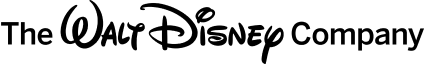


✅ Extracted Article Text (first 500 chars):

The news will be handed down "soon," Paul says.
Republican Rising Star Rand Paul Announces 2016 Presidential Bid
MILFORD, New Hampshire&#151; -- Sen. Rand Paul spent part of his second day as an officially declared presidential candidate hinting that big revelations are coming “soon” about the foundation headed by the Clinton family, but declined to divulge specifics, pointing out “it wouldn’t be a secret anymore” if he did.
“I think there are things that went on at the Clinton Foundation that a
...


In [23]:
import time
import os
import random
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import (
    WebDriverException,
    TimeoutException,
    NoSuchElementException
)
from bs4 import BeautifulSoup

# Manually specify paths (adjust to your local environment)
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")  # Path to your geckodriver
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")  # Path to your Firefox binary

def scroll_down(driver, max_scrolls=8, pause_time=1.5):
    """
    Scroll down the page multiple times to load dynamic or lazy-loaded content.
    """
    last_height = driver.execute_script("return document.body.scrollHeight")

    for _ in range(max_scrolls):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(pause_time)

        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break  # Stop if no new content loaded
        last_height = new_height

def handle_cookies(driver):
    """
    Attempt to close or accept cookie/consent popups.
    Adjust or add more button selectors as needed.
    """
    possible_selectors = [
        "button.accept",             # Generic
        "button#onetrust-accept-btn-handler",
        "button[title='Accept']",    # Common on some sites
        "button#truste-consent-button",
        "button[aria-label='Accept cookies']",
        "button[data-testid='TcfAccept']",
        "button[mode='primary']"     # Variation
    ]

    for selector in possible_selectors:
        try:
            btn = WebDriverWait(driver, 3).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, selector))
            )
            btn.click()
            # If a button was found and clicked, we do a short wait
            time.sleep(1)
            break  # Stop after the first successful click
        except:
            pass  # If not found, try the next selector

def clean_text(paragraphs):
    """
    Remove unwanted text such as disclaimers, ads, very short lines, etc.
    Adjust the set of rules as needed.
    """
    unwanted_phrases = [
        "newsletter", "sign up", "subscribe", "our standards", "opens new tab",
        "reporting by", "editing by", "photo by", "image credit", "advertisement",
        "cookie policy", "accept cookies", "register now", "all quotes delayed",
        "factbox", "reuters staff", "©"
    ]

    cleaned = []
    for p in paragraphs:
        text = p.strip()

        # Skip very short lines
        if len(text) < 30:
            continue

        # Exclude paragraphs containing unwanted phrases
        if any(phrase in text.lower() for phrase in unwanted_phrases):
            continue

        cleaned.append(text)

    return cleaned

def detect_news_site(url):
    """
    Detect which news site we're dealing with (nytimes, reuters, or unknown).
    """
    if "nytimes.com" in url:
        return "nytimes"
    elif "reuters.com" in url:
        return "reuters"
    return "unknown"

def extract_text_from_soup(soup, news_site):
    """
    Extract article text based on known website structures.
    If those fail, fall back to a generic approach.
    """
    paragraphs = []

    if news_site == "nytimes":
        # NYTimes articles typically inside <article> tags containing <p>
        article_tag = soup.find("article")
        if article_tag:
            paragraphs = [p.get_text() for p in article_tag.find_all("p")]

    elif news_site == "abcnews":
        # Reuters older layout
        article_tag = (
            soup.find("div", class_="article-body") or
            soup.find("div", class_="StandardArticleBody_body")
        )
        # Reuters newer layout
        if not article_tag:
            article_tag = (
                soup.find("div", {"data-testid": "Body"}) or
                soup.find("div", {"data-testid": "article-body-content"}) or
                soup.find("div", {"data-testid": "ArticleBody"})
            )
        # If found, gather paragraphs
        if article_tag:
            paragraphs = [p.get_text() for p in article_tag.find_all("p")]

    # Fallback: If we still have no paragraphs, grab all <p> from the entire doc
    if not paragraphs:
        paragraphs = [p.get_text() for p in soup.find_all("p")]

    return clean_text(paragraphs)

def selenium_get_text(url, max_retries=3):
    """
    Extract article text from the given URL (NYTimes or Reuters).
    Retries up to max_retries if something goes wrong.
    """
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    # Identify the site type (NYTimes, Reuters, etc.)
    news_site = detect_news_site(url)

    for attempt in range(max_retries):
        try:
            service = Service(GECKODRIVER_PATH)
            driver = webdriver.Firefox(service=service, options=options)
            driver.get(url)

            # Give the page a moment to load JavaScript, etc.
            time.sleep(random.uniform(2, 4))

            # Handle possible cookie popup
            handle_cookies(driver)

            # Scroll down to ensure lazy-loaded elements appear
            scroll_down(driver)

            # Wait for at least one paragraph to appear
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.TAG_NAME, "p"))
            )

            # Parse with BeautifulSoup
            soup = BeautifulSoup(driver.page_source, "html.parser")
            driver.quit()

            # Extract the article text
            paragraphs = extract_text_from_soup(soup, news_site)
            article_text = "\n".join(paragraphs)

            if article_text.strip():
                return article_text

        except (WebDriverException, TimeoutException, NoSuchElementException) as e:
            print(f"Attempt {attempt+1} failed with error: {e}")
            time.sleep(2)

    # If all attempts fail:
    print("❌ Failed to extract article after multiple attempts.")
    return None

# ----------------- TESTING THE SCRAPER ---------------------

if __name__ == "__main__":
    test_urls = [
        "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
        "https://abcnews.go.com/Politics/rand-paul-predicts-hillary-clinton-revelations-shock-people/story?id=30162559"
    ]

    for url in test_urls:
        print(f"\n🔍 Extracting: {url}")
        article_text = selenium_get_text(url)

        if article_text:
            print("\n✅ Extracted Article Text (first 500 chars):\n")
            print(article_text[:500])
            print("...")
        else:
            print("❌ Failed to extract article text.")

In [75]:
import time
import os
import random
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import (
    WebDriverException,
    TimeoutException,
    NoSuchElementException
)
from bs4 import BeautifulSoup

# Adjust paths as appropriate for your system:
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")


def scroll_down(driver, max_scrolls=8, pause_time=1.5):
    """Scrolls down the page multiple times to load lazy-loaded content."""
    last_height = driver.execute_script("return document.body.scrollHeight")
    for _ in range(max_scrolls):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(pause_time)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height


def handle_cookies(driver):
    """
    Attempt to close or accept cookie popups or GDPR consent.
    Tweak the CSS selectors as needed for specific sites.
    """
    possible_selectors = [
        "button.accept",
        "button#onetrust-accept-btn-handler",
        "button[title='Accept']",
        "button#truste-consent-button",
        "button[aria-label='Accept cookies']",
        "button[data-testid='TcfAccept']",
        "button[mode='primary']"
    ]
    for selector in possible_selectors:
        try:
            btn = WebDriverWait(driver, 3).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, selector))
            )
            btn.click()
            time.sleep(1)
            break
        except:
            pass  # If not found, move on to next selector


def clean_text(paragraphs):
    """
    Removes obviously unwanted text (footers, disclaimers, extraneous short lines).
    You can expand the list of unwanted phrases if you see repeated garbage text.
    """
    unwanted_phrases = [
        "footer", "newsletter", "subscribe", "sign up", "our standards",
        "opens new tab", "reuters provides business", "thomson reuters products",
        "register now", "cookie policy", "accept cookies",
        "desktop terminals", "build the strongest argument"  # etc., tweak as needed
    ]

    cleaned = []
    for p in paragraphs:
        text = p.strip()
        # Skip if it is too short
        if len(text) < 30:
            continue
        # Skip if it contains typical unwanted phrases
        if any(phrase in text.lower() for phrase in unwanted_phrases):
            continue
        cleaned.append(text)
    return cleaned


def detect_news_site(url):
    """Identify whether it's NYTimes, Reuters, or unknown."""
    if "nytimes.com" in url:
        return "nytimes"
    elif "reuters.com" in url:
        return "reuters"
    return "unknown"


def extract_text_from_soup(soup, news_site):
    """
    Extract article text from a BeautifulSoup object based on known site structures.
    For Reuters, we specifically avoid footers and disclaimers by focusing on main
    article containers like data-testid="ArticleBody".
    """
    paragraphs = []

    if news_site == "nytimes":
        # New York Times articles typically inside <article>
        article_tag = soup.find("article")
        if article_tag:
            paragraphs = [p.get_text() for p in article_tag.find_all("p")]

    elif news_site == "reuters":
        # Try new Reuters container first
        article_tag = soup.find("div", {"data-testid": "ArticleBody"})
        # If not found, try older containers:
        if not article_tag:
            article_tag = soup.find("div", class_="StandardArticleBody_body")
        # Or an <article> tag (some pages actually do have <article>)
        if not article_tag:
            article_tag = soup.find("article")

        if article_tag:
            paragraphs = [p.get_text() for p in article_tag.find_all("p")]

    # Fallback: if we have no paragraphs, use all <p> from the page
    # (this might include footers, ads, disclaimers, etc., so we do it last)
    if not paragraphs:
        paragraphs = [p.get_text() for p in soup.find_all("p")]

    return clean_text(paragraphs)


def selenium_get_text(url, max_retries=3):
    """
    Main function: uses Selenium to load the page, scroll, handle cookies,
    and then parse the article text with BeautifulSoup.
    """
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    news_site = detect_news_site(url)

    for attempt in range(max_retries):
        try:
            service = Service(GECKODRIVER_PATH)
            driver = webdriver.Firefox(service=service, options=options)
            driver.get(url)
            time.sleep(random.uniform(2, 4))  # Let the page load a bit

            # Attempt to handle cookie popups
            handle_cookies(driver)

            # Scroll down to load lazy-loaded content
            scroll_down(driver)

            # Wait for at least one paragraph to appear
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.TAG_NAME, "p"))
            )

            # Parse with BeautifulSoup
            soup = BeautifulSoup(driver.page_source, "html.parser")
            driver.quit()

            # Extract the main article text
            paragraphs = extract_text_from_soup(soup, news_site)
            article_text = "\n".join(paragraphs)
            if article_text.strip():
                return article_text

        except (WebDriverException, TimeoutException, NoSuchElementException) as e:
            print(f"Attempt {attempt+1} failed with error: {e}")
            time.sleep(2)

    print("❌ Failed to extract article after multiple attempts.")
    return None


# ----------------- EXAMPLE USAGE ---------------------
if __name__ == "__main__":
    test_urls = [
        # A NYTimes article
        "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
        # A Reuters article
        "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/",
    ]

    for url in test_urls:
        print(f"\n🔍 Extracting: {url}")
        article_text = selenium_get_text(url)

        if article_text:
            print("\n✅ Extracted Article Text (first 500 chars):\n")
            print(article_text[:500] + "...")
        else:
            print("❌ Failed to extract article text.")



🔍 Extracting: https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html

✅ Extracted Article Text (first 500 chars):

By Karen Workman and Sandra Stevenson
(Want to get this briefing by email? Here’s the sign-up.)
Good evening. Here’s the latest.
1. President-elect Donald J. Trump picked a retired Marine general, an advocate of China and a close ally of the fossil fuel industry for three crucial posts.
Gen. John F. Kelly, above, a retired Marine general, will be nominated as secretary of homeland security, and Gov. Terry E. Branstad of Iowa was named ambassador to China. Mr. Branstad is close to President Xi Ji...

🔍 Extracting: https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/

✅ Extracted Article Text (first 500 chars):

Reporting by Elizabeth Piper; editing by William James and Katy Daigle...


In [78]:
import requests
from bs4 import BeautifulSoup
import json

def get_reuters_article_text(url):
    """
    Attempt to extract article text from a Reuters page
    by parsing <script type="application/ld+json">. 
    If that fails, fallback to HTML <p> extraction.
    """

    # Use a desktop-like User-Agent to avoid minimal or mobile site
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
            "(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
        )
    }
    resp = requests.get(url, headers=headers)
    
    if resp.status_code != 200:
        print(f"Request failed with status {resp.status_code}")
        return None

    soup = BeautifulSoup(resp.text, "html.parser")

    # 1) Attempt to parse JSON-LD first
    article_body = None
    for script_tag in soup.find_all("script", {"type": "application/ld+json"}):
        try:
            data = json.loads(script_tag.string)
            
            # Some pages embed a list in their ld+json, so handle that:
            if isinstance(data, list):
                for item in data:
                    # If it's the main Article schema
                    if item.get("@type") == "NewsArticle":
                        article_body = item.get("articleBody")
                        if article_body:
                            break
            else:
                # Single JSON object
                if data.get("@type") == "NewsArticle":
                    article_body = data.get("articleBody")

            if article_body:
                # Once we have the main text, we stop
                break
        except (json.JSONDecodeError, TypeError):
            # If the script tag isn't valid JSON or doesn't match
            continue

    # 2) If we *did* get an article body from JSON, clean & return it
    if article_body:
        # Basic cleaning: remove any awkward spacing or disclaimers
        lines = [line.strip() for line in article_body.split("\n") if line.strip()]
        # Optionally remove short lines like “(Reporting by …)”
        cleaned_lines = [l for l in lines if len(l) > 50]
        return "\n".join(cleaned_lines).strip()

    # 3) Fallback: if there's no JSON-LD with articleBody, 
    #    try extracting paragraphs from known containers
    #    or just gather all <p> as a fallback.
    paragraphs = []
    
    # Possible containers for newer/older Reuters layouts:
    reuters_selectors = [
        "div[data-testid='ArticleBody']",
        "div.StandardArticleBody_body",
        "article"
    ]

    container = None
    for sel in reuters_selectors:
        container = soup.select_one(sel)
        if container:
            break

    # If we found a container, grab its <p> tags;
    # otherwise, fall back to all <p> in the page
    if container:
        paragraphs = [p.get_text().strip() for p in container.find_all("p")]
    else:
        paragraphs = [p.get_text().strip() for p in soup.find_all("p")]

    # Light cleanup
    paragraphs = [p for p in paragraphs if len(p) > 50 and "reporting by" not in p.lower()]

    if paragraphs:
        return "\n".join(paragraphs).strip()

    # If no text found at all
    return None

# ----------------- USAGE EXAMPLE ---------------------
if __name__ == "__main__":
    url = "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
    article_text = get_reuters_article_text(url)
    if article_text:
        print("Extracted article text:\n")
        print(article_text[:800], "...")
    else:
        print("No article text found.")


Request failed with status 401
No article text found.


In [76]:
import time
import os
import random
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import WebDriverException, TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup

# Set your paths for geckodriver and Firefox binary
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")

def scroll_down(driver, scroll_pause_time=1.5, max_scrolls=5):
    """Scroll down the page gradually to load dynamic content."""
    last_height = driver.execute_script("return document.body.scrollHeight")
    for _ in range(max_scrolls):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(scroll_pause_time)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

def clean_text(paragraphs):
    """Remove unwanted text fragments (ads, newsletter prompts, etc.)."""
    unwanted_phrases = [
        "newsletter", "sign up", "subscribe", "our standards", "opens new tab",
        "reporting by", "editing by", "photo by", "image credit", "advertisement",
        "cookie policy", "accept cookies", "register now", "click here", "read more"
    ]
    return [
        p.strip() for p in paragraphs 
        if len(p.strip()) > 30 and not any(phrase in p.lower() for phrase in unwanted_phrases)
    ]

def detect_news_site(url):
    """Detect if the URL is from NYTimes, Reuters, or unknown."""
    if "nytimes.com" in url:
        return "nytimes"
    elif "reuters.com" in url:
        return "reuters"
    return "unknown"

def extract_text_from_soup(soup, news_site):
    """Extract article paragraphs from the BeautifulSoup object based on site structure."""
    paragraphs = []
    if news_site == "nytimes":
        article_tag = soup.find("article")
        if article_tag:
            paragraphs = [p.get_text() for p in article_tag.find_all("p")]
    elif news_site == "reuters":
        # Try several container selectors that Reuters may use.
        containers = []
        selectors = [
            "div[data-testid='Body']",
            "div.ArticleBody__content___2gQno",
            "div.StandardArticleBody_body",
            "div.article-body",
            "div.ArticleBodyWrapper"
        ]
        for sel in selectors:
            containers.extend(soup.select(sel))
        # Remove duplicates while preserving order.
        seen = set()
        unique_containers = []
        for c in containers:
            if c not in seen:
                unique_containers.append(c)
                seen.add(c)
        # Collect all <p> tags from these containers.
        for container in unique_containers:
            paragraphs.extend([p.get_text() for p in container.find_all("p")])
        if not paragraphs:
            # Fallback: try extracting from <main>
            main = soup.find("main")
            if main:
                paragraphs = [p.get_text() for p in main.find_all("p")]
            else:
                paragraphs = [p.get_text() for p in soup.find_all("p")]
    else:
        main = soup.find("main")
        if main:
            paragraphs = [p.get_text() for p in main.find_all("p")]
        else:
            paragraphs = [p.get_text() for p in soup.find_all("p")]
    return clean_text(paragraphs)

def selenium_get_text(url, max_retries=3):
    """Extract article text from a given URL using Selenium."""
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.binary_location = FIREFOX_BINARY_PATH

    news_site = detect_news_site(url)
    for attempt in range(max_retries):
        driver = None
        try:
            service = Service(GECKODRIVER_PATH)
            driver = webdriver.Firefox(service=service, options=options)
            driver.set_page_load_timeout(30)
            driver.get(url)
            # Short random delay to mimic human browsing.
            time.sleep(random.uniform(3, 5))
            scroll_down(driver)
            # Extra wait to allow lazy-loaded content to appear.
            time.sleep(3)
            
            if news_site == "nytimes":
                WebDriverWait(driver, 15).until(
                    EC.presence_of_element_located((By.TAG_NAME, "article"))
                )
            elif news_site == "reuters":
                try:
                    # Wait for any container that seems to hold article text.
                    WebDriverWait(driver, 15).until(
                        EC.presence_of_element_located(
                            (By.CSS_SELECTOR, "div[data-testid='Body'], div[class*='ArticleBody'], div[class*='StandardArticleBody'], div.ArticleBodyWrapper")
                        )
                    )
                except TimeoutException:
                    # Fallback: wait for any <p> tag.
                    WebDriverWait(driver, 15).until(
                        EC.presence_of_element_located((By.TAG_NAME, "p"))
                    )
            else:
                WebDriverWait(driver, 15).until(
                    EC.presence_of_element_located((By.TAG_NAME, "p"))
                )
            
            soup = BeautifulSoup(driver.page_source, "html.parser")
            paragraphs = extract_text_from_soup(soup, news_site)
            article_text = "\n".join(paragraphs).strip()
            driver.quit()
            if article_text:
                return article_text
        except (WebDriverException, TimeoutException, NoSuchElementException) as e:
            print(f"Attempt {attempt+1} failed: {e}")
            if driver:
                driver.quit()
            time.sleep(2)
            continue
    print("Failed to extract article after multiple attempts.")
    return None

# Example usage:
if __name__ == "__main__":
    test_urls = [
        "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/"
    ]
    for url in test_urls:
        print(f"\nExtracting: {url}")
        article_text = selenium_get_text(url)
        if article_text:
            print("\n✅ Extracted Article Text:\n")
            print(article_text[:1000])  # Show first 1000 characters
        else:
            print("❌ Failed to extract article text.")


Extracting: https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/
Failed to extract article after multiple attempts.
❌ Failed to extract article text.


In [69]:
import time
import os
import random
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import (WebDriverException, TimeoutException, 
                                      NoSuchElementException, ElementNotInteractableException)
from bs4 import BeautifulSoup

# Configuration paths
GECKODRIVER_PATH = os.path.expanduser("~/geckodriver")
FIREFOX_BINARY_PATH = os.path.expanduser("~/firefox/firefox")

def accept_cookies(driver):
    """Attempt to accept cookies if a consent banner is present."""
    try:
        cookie_buttons = WebDriverWait(driver, 5).until(
            EC.presence_of_all_elements_located(
                (By.XPATH, "//button[contains(., 'Accept') or contains(., 'Agree')]")
            )
        )
        for btn in cookie_buttons:
            if btn.is_displayed():
                btn.click()
                print("✅ Accepted cookies")
                time.sleep(1)
                return
    except (TimeoutException, ElementNotInteractableException):
        pass

def scroll_down(driver):
    """Better scrolling logic with dynamic waiting."""
    last_height = driver.execute_script("return document.body.scrollHeight")
    scroll_attempts = 0
    
    while scroll_attempts < 5:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(random.uniform(1.5, 2.5))
        new_height = driver.execute_script("return document.body.scrollHeight")
        
        if new_height == last_height:
            break
            
        last_height = new_height
        scroll_attempts += 1

def clean_text(paragraphs):
    """Enhanced cleaning with more filters and length checks."""
    unwanted_phrases = [
        "newsletter", "sign up", "subscribe", "our standards", "opens new tab",
        "reporting by", "editing by", "photo by", "image credit", "advertisement",
        "cookie policy", "accept cookies", "register now", "Thomson Reuters",
        "read more", "sponsor content", "related coverage", "what's next"
    ]
    return [
        p.strip() for p in paragraphs
        if len(p.strip()) > 50 and not any(phrase in p.lower() for phrase in unwanted_phrases)
    ]

def detect_news_site(url):
    """Identify supported news websites."""
    domain_mapping = {
        "nytimes.com": "nytimes",
        "reuters.com": "reuters"
    }
    for domain, site in domain_mapping.items():
        if domain in url:
            return site
    return "unknown"

def extract_reuters_text(driver):
    """Improved Reuters extraction with multiple fallback strategies."""
    paragraphs = []
    selectors = [
        ("main article container", "div[data-testid='article-body']"),
        ("fallback container", "article"),
        ("legacy container", "div.StandardArticleBody_body")
    ]
    
    for name, selector in selectors:
        try:
            article_body = WebDriverWait(driver, 15).until(
                EC.visibility_of_element_located((By.CSS_SELECTOR, selector))
            )
            print(f"✅ Found Reuters article using {name} selector")
            paragraph_elements = article_body.find_elements(By.XPATH, ".//p[not(contains(@class, 'hidden'))]")
            paragraphs = [p.text.strip() for p in paragraph_elements if p.text.strip()]
            if paragraphs:
                return clean_text(paragraphs)
        except TimeoutException:
            continue
            
    print("⚠️ All Reuters selectors failed, trying backup method")
    try:
        soup = BeautifulSoup(driver.page_source, "html.parser")
        paragraphs = [p.get_text().strip() for p in soup.select('div.article-body p')]
        return clean_text(paragraphs)
    except Exception as e:
        print(f"⚠️ Backup extraction failed: {e}")
        return []

def extract_nytimes_text(driver):
    """Enhanced NYTimes extraction with multiple checks."""
    try:
        WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.TAG_NAME, "article"))
        )
        soup = BeautifulSoup(driver.page_source, "html.parser")
        
        # Try different content section selectors
        article = soup.find("article") or soup.find("div", {"data-testid": "article-body"})
        
        if article:
            # Remove unnecessary elements
            for selector in ['.ad', '.related-coverage', '.newsletter-signup']:
                for element in article.select(selector):
                    element.decompose()
            
            paragraphs = [p.get_text().strip() for p in article.find_all("p")]
            return clean_text(paragraphs)
            
    except TimeoutException:
        print("⚠️ NYTimes article content not found")
        
    return []

def selenium_get_text(url, max_retries=3):
    """Robust extraction function with improved error handling."""
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.binary_location = FIREFOX_BINARY_PATH
    
    news_site = detect_news_site(url)
    
    for attempt in range(max_retries):
        try:
            service = Service(GECKODRIVER_PATH)
            driver = webdriver.Firefox(service=service, options=options)
            driver.get(url)
            
            # Initial page interaction
            time.sleep(random.uniform(2, 4))
            accept_cookies(driver)
            scroll_down(driver)
            
            # Site-specific extraction
            if news_site == "nytimes":
                content = "\n".join(extract_nytimes_text(driver))
            elif news_site == "reuters":
                content = "\n".join(extract_reuters_text(driver))
            else:
                print("❌ Unsupported website")
                return None

            driver.quit()
            
            if content.strip():
                return content
                
        except (WebDriverException, TimeoutException) as e:
            print(f"⚠️ Attempt {attempt+1} failed: {str(e)[:100]}...")
            time.sleep(random.uniform(3, 6))
            
    print("❌ Failed after multiple attempts")
    return None

# Test URLs
test_urls = [
    "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html",
    "https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/",
]

for url in test_urls:
    print(f"\n🔍 Extracting: {url}")
    start_time = time.time()
    article_text = selenium_get_text(url)
    elapsed = time.time() - start_time

    if article_text:
        print(f"\n✅ Success ({elapsed:.1f}s): First 500 characters:")
        print(article_text[:500])
    else:
        print(f"❌ Failed to extract article ({elapsed:.1f}s)")


🔍 Extracting: https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html

✅ Success (17.8s): First 500 characters:
(Want to get this briefing by email? Here’s the sign-up.)
1. President-elect Donald J. Trump picked a retired Marine general, an advocate of China and a close ally of the fossil fuel industry for three crucial posts.
Gen. John F. Kelly, above, a retired Marine general, will be nominated as secretary of homeland security, and Gov. Terry E. Branstad of Iowa was named ambassador to China. Mr. Branstad is close to President Xi Jinping of China, whom he has known since 1985.
Scott Pruitt, the Oklahom

🔍 Extracting: https://www.reuters.com/business/cop/us-collaborating-not-condescending-climate-change-speaker-pelosi-2021-11-10/
✅ Found Reuters article using fallback container selector
✅ Found Reuters article using fallback container selector
✅ Found Reuters article using fallback container selector
❌ Failed after multiple attempts
❌ Failed to extract article

In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

def selenium_get_text(url):
    options = Options()
    options.add_argument("--headless")  # Run in headless mode (for servers)
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")

    # Initialize Chrome WebDriver
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    try:
        driver.get(url)
        time.sleep(3)  # Give time for page to load

        soup = BeautifulSoup(driver.page_source, "html.parser")
        driver.quit()

        # Extract article text
        article_tag = soup.find("article")
        if article_tag:
            return " ".join([p.get_text() for p in article_tag.find_all("p")])
        return None

    except Exception as e:
        driver.quit()
        print(f"Error: {e}")
        return None

# Example URL
url = "https://www.nytimes.com/2016/12/07/briefing/donald-trump-indonesia-aleppo.html"
article_text = selenium_get_text(url)

if article_text:
    print("\nExtracted Article Text:\n")
    print(article_text[:1000])  # Print first 1000 characters
else:
    print("Failed to extract article text.")


WebDriverException: Message: unknown error: cannot find Chrome binary
Stacktrace:
#0 0x55926b8614e3 <unknown>
#1 0x55926b590c76 <unknown>
#2 0x55926b5b7757 <unknown>
#3 0x55926b5b6029 <unknown>
#4 0x55926b5f4ccc <unknown>
#5 0x55926b5f447f <unknown>
#6 0x55926b5ebde3 <unknown>
#7 0x55926b5c12dd <unknown>
#8 0x55926b5c234e <unknown>
#9 0x55926b8213e4 <unknown>
#10 0x55926b8253d7 <unknown>
#11 0x55926b82fb20 <unknown>
#12 0x55926b826023 <unknown>
#13 0x55926b7f41aa <unknown>
#14 0x55926b84a6b8 <unknown>
#15 0x55926b84a847 <unknown>
#16 0x55926b85a243 <unknown>
#17 0x7f88faa43ac3 <unknown>
